In [10]:
import json
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import country_converter as coco
import pandas as pd
import seaborn as sns
import matplotlib. pyplot as plt 
import newspaper
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.cm as cm

In [661]:
with open('./Final Data/3 - final_data.json') as f:
        final_results = json.load(f)

## View Hong Kong and China media domains

In [12]:
domains_count = {}
for year in range(2017,2024):
    year = str(year)
    for num in range(len(final_results[year])):
        if final_results[year][num]['sourcecountry'] == 'China' or final_results[year][num]['sourcecountry'] == 'Hong Kong':
            try:
                domains_count[final_results[year][num]['domain']] +=1
            except:
                domains_count[final_results[year][num]['domain']] = 1

domains_count = dict(sorted(domains_count.items(), reverse=True, key=lambda item: item[1]))

### Correct some major news outlet sourcecountry (News Articles >=25)

In [16]:
sourcecountry_dict = {'thediplomat.com': 'United States',
                      'scmp.com': 'Hong Kong',
                      'hellenicshippingnews.com': 'Greece',
                      'thestandard.com.hk': 'Hong Kong',
                      'hongkongherald.com': 'Hong Kong',
                      'chinafocus.com': 'Hong Kong',
                      'ejinsight.com': 'Hong Kong',
                      'chinaeconomicreview.com': 'Hong Kong',
                      'eastasiaforum.org': 'Australia',
                      'lowyinstitute.org': 'Australia',
                      'asiabulletin.com': 'Australia',
                      'rfa.org': 'United States',
                      'asiasentinel.com': 'United States',
                      'asiasociety.org': 'United States',
                      'chinadigitaltimes.net': 'United States',
                      'tibet.net': 'India',
                      'devdiscourse.com': 'India',
                      'alwihdainfo.com': 'Chad',
                      'euromoney.com': 'United Kingdom',
                      'porttechnology.org': 'United Kingdom',
                      'freshplaza.com': 'Netherlands',
                      'globalcapital.com': 'United Kingdom',
                      'csis.org': 'United States',
                      'strategypage.com': 'United States',
                      'unpo.org': 'Netherlands',
                      'en.yibada.com': 'United States',
                      'nextbigfuture.com': 'United States',
                      'traveldailynews.asia': 'Greece',
                      'legalbusinessonline.com': 'United States',
                      'barrons.com': 'United States'}

sourcecountry_list = list(sourcecountry_dict.keys())

In [14]:
count = 0
for year in range(2017,2024):
    year = str(year)
    for num in range(len(final_results[year])):
        if final_results[year][num]['domain'] in sourcecountry_list:
            try:
                final_results[year][num]['sourcecountry'] = sourcecountry_dict[final_results[year][num]['domain']]
                count+=1
            except:
                print(year,num)

print("Number of articles corrected: ", count)

Number of articles corrected:  4236


In [15]:
domains_count = {}
for year in range(2017,2024):
    year = str(year)
    for num in range(len(final_results[year])):
        if final_results[year][num]['sourcecountry'] == 'China' or final_results[year][num]['sourcecountry'] == 'Hong Kong':
            try:
                domains_count[final_results[year][num]['domain']] +=1
            except:
                domains_count[final_results[year][num]['domain']] = 1

domains_count = dict(sorted(domains_count.items(), reverse=True, key=lambda item: item[1]))

In [9]:
domains_count

{'news.xinhuanet.com': 5061,
 'xinhuanet.com': 3588,
 'china.org.cn': 2359,
 'globaltimes.cn': 2132,
 'chinadaily.com.cn': 1932,
 'en.people.cn': 1755,
 'scmp.com': 1183,
 'ecns.cn': 1051,
 'global.chinadaily.com.cn': 1026,
 'english.sina.com': 1000,
 'bjreview.com': 987,
 'en.ce.cn': 851,
 'fmprc.gov.cn': 571,
 'usa.chinadaily.com.cn': 537,
 'europe.chinadaily.com.cn': 484,
 'africa.chinadaily.com.cn': 480,
 'chinanationalnews.com': 342,
 'thestandard.com.hk': 320,
 'bjreview.com.cn': 309,
 'beijingbulletin.com': 300,
 'shanghaisun.com': 293,
 'news.cgtn.com': 277,
 'english.chinamil.com.cn': 205,
 'gbtimes.com': 199,
 '7thspace.com': 169,
 'english.jschina.com.cn': 165,
 'womenofchina.cn': 160,
 'chinaview.cn': 151,
 'chinafile.com': 148,
 'shine.cn': 138,
 'china-briefing.com': 127,
 'english.anhuinews.com': 123,
 'shanghaidaily.com': 121,
 'chinadialogue.net': 112,
 'chinausfocus.com': 109,
 'shanghainews.net': 107,
 'caixinglobal.com': 97,
 'news.cn': 95,
 'archive.shine.cn': 83,


In [17]:
# For updating labelled_domains.json
with open('labelled_domains.json') as f:
        labelled_domains = json.load(f)

for i in range(len(sourcecountry_list)):
    try:
        labelled_domains[sourcecountry_list[i]] = sourececountry_dict[sourcecountry_list[i]]
    except:
        pass

#with open('labelled_domains.json', 'w', encoding='utf-8') as f:
        #json.dump(labelled_domains, f, indent=4, default=str)

## Data Visualisation

### By Year

#### Code

In [340]:
with open('./Final Data/5 - with_text2.json') as f:
        final_results = json.load(f)

In [678]:
country_df = pd.DataFrame(columns=['Country','Count','Year'])
country_df["Count"]=country_df["Count"].astype(float)
for year in range(2017,2024):
    country_count = {}
    year = str(year)
    for i in range(len(final_results[year])):
        try:
            country_count[final_results[year][i]['sourcecountry']] +=1
        except:
            country_count[final_results[year][i]['sourcecountry']] =1

    country_count = sorted(country_count.items(), reverse=True, key=lambda item: item[1])
    df = pd.DataFrame.from_dict(country_count).set_axis(['Country', 'Count'], axis=1)
    df['Year'] = year
    country_df= pd.concat([country_df,df])

country_df.index +=1

In [679]:
# List of major countries
major_countries = ['China', 'United States', 'India', 'United Kingdom', 'Malaysia', 'Pakistan', 'Hong Kong', 
                   'Malaysia', 'Global']

df2 = pd.DataFrame.copy(country_df)

# Replace countries not in major countries with 'Others'
df2['Country'] = df2['Country'].apply(lambda x: x if x in major_countries else 'Others')



#### Plot

In [680]:
colour_dict = ['#e41a1c','#ff7f00','#377eb8','#984ea3','#4daf4a','#a65628','#ffff33','#f781bf']

fig = px.histogram(df2[df2['Country']!='Global'], x='Year',y='Count',color='Country', labels={'Count':'Number of Articles', 'Year':'Year'}, title='Number of News Articles by Country',
                   template='plotly_white', color_discrete_sequence=colour_dict)

fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.855
))

# Make the figure bigger
fig.update_layout(title_x=0.05, title_y=0.88)
fig.update_layout(autosize=False, width=1200, height=600)

fig.update_traces(marker_line_width=1.3,marker_line_color="white")

fig.show()

#### Code

In [681]:
country_df = pd.DataFrame(columns=['Country','Count','Year'])
country_df["Count"]=country_df["Count"].astype(float)
for year in range(2017,2024):
    country_count = {}
    year = str(year)
    for i in range(len(final_results[year])):
        try:
            country_count[final_results[year][i]['sourcecountry']] +=1
        except:
            country_count[final_results[year][i]['sourcecountry']] =1

    country_count = sorted(country_count.items(), reverse=True, key=lambda item: item[1])
    df = pd.DataFrame.from_dict(country_count).set_axis(['Country', 'Count'], axis=1)
    df['Year'] = year
    country_df= pd.concat([country_df,df])

country_df.index +=1

country_df['Average Tone'] = 0
for year in range(2017,2024):
    year = str(year)
    total_tone = 0
    for num in range(len(final_results[year])):
        country = final_results[year][num]['sourcecountry']
        tone = final_results[year][num]['tone']
        country_df.loc[(country_df['Country']==country) & (country_df['Year']==str(year)), 'Average Tone'] += int(tone)

country_df["Average Tone"]=country_df["Average Tone"].astype(float)
for num in range(len(country_df)):
    country_df.iat[num,3] = country_df.iat[num,3] / country_df.iat[num,1]

In [682]:
# Calculate sum of counts and average tone for each year
yearly_stats = country_df.groupby('Year').agg({'Count': 'sum', 'Average Tone': 'mean'}).reset_index()

# Create a DataFrame for 'Global' with the yearly stats
global_data = {
    'Country': ['Global'] * len(yearly_stats),
    'Count': yearly_stats['Count'],
    'Average Tone': yearly_stats['Average Tone'],
    'Year': yearly_stats['Year']
}
global_df = pd.DataFrame(global_data)

country_df = pd.concat([country_df, global_df]).sort_values(by=['Year', 'Count'], ascending=[True, False]).reset_index(drop=True)
country_df.index +=1

#### Plot

In [683]:

colour_dict = ['#f781bf','#984ea3','#e41a1c','#377eb8','#ff7f00','#ffff33','#a65628','#4daf4a']


fig = px.scatter(country_df[country_df['Country'].isin(major_countries)],
                 x="Year", y="Average Tone", color="Country", title="Average Tone per Year (GDELT)", hover_data = ['Count'], color_discrete_sequence=colour_dict,
                  category_orders={'Country': ['Global','Hong Kong', 'China', 'United States', 'India', 'United Kingdom', 'Malaysia', 'Pakistan' ]}, template='none')

for country in country_df['Country']:
    fig.update_traces(marker=dict(size=15, line=dict(width=2)), selector=dict(name=country))

# Update marker size and shape for "Hong Kong" points
fig.update_traces(marker=dict(symbol='x-dot'), selector=dict(name='Global'))
fig.update_traces(marker=dict(symbol='square'), selector=dict(name=major_countries[0]))
fig.update_traces(marker=dict(symbol='cross'), selector=dict(name=major_countries[1]))
fig.update_traces(marker=dict(symbol='circle'), selector=dict(name=major_countries[2]))
fig.update_traces(marker=dict(symbol='triangle-up'), selector=dict(name=major_countries[3]))
fig.update_traces(marker=dict(symbol='pentagon'), selector=dict(name=major_countries[4]))
fig.update_traces(marker=dict(symbol='diamond-wide'), selector=dict(name=major_countries[5]))
fig.update_traces(marker=dict(symbol='star-dot'), selector=dict(name=major_countries[6]))
fig.update_traces(marker=dict(symbol='bowtie'), selector=dict(name=major_countries[7]))


# Make the figure bigger
fig.update_layout(title_x=0.05, title_y=0.88)
fig.update_layout(autosize=False, width=1200, height=600)
fig.layout.legend.tracegroupgap = 5

fig.show()

### By Month

In [209]:

# create an empty dictionary to hold the results
results = {}

# loop through the data and calculate the average tone for each country for each month-year combination
for year, data in final_results.items():
    for item in data:
        month_year = item['date'][:6] # extract the month-year from the date
        if month_year not in results:
            results[month_year] = {}
        country = item['sourcecountry']
        tone = item['tone']
        if country not in results[month_year]:
            results[month_year][country] = []
        results[month_year][country].append(tone)

# fill in the results dictionary with the calculated values
for month_year, country_data in results.items():
    for country, tone_list in country_data.items():
        avg_tone = sum(tone_list) / len(tone_list)
        results[month_year][country] = avg_tone

# create a dataframe from the results dictionary
country_month_df = pd.DataFrame.from_dict(results, orient='columns')

global_mean = pd.DataFrame(country_month_df.mean(axis=0), columns=['Global']).T

# Insert 'Global' at the top
country_month_df = pd.concat([global_mean, country_month_df])

# Reset the index to include 'Country' as a column
country_month_df.reset_index(names='Country',inplace=True)

In [210]:
# melt the dataframe to long format
melted_df = pd.melt(country_month_df[country_month_df['Country'].isin(['Global','Hong Kong', 'China', 'United States', 'United Kingdom'])], id_vars=['Country'], var_name='Month-Year', value_name='Tone')
melted_df = melted_df.set_index('Country')

color_dict = {'Global': 'Grey', 'Hong Kong': 'blue', 'China': 'Red', 'United States': 'Green', 'United Kingdom': 'Orange'}

fig = px.scatter(melted_df,
                 x="Month-Year", y="Tone", color=melted_df.index, color_discrete_map=color_dict, title="Average Tone per Month")

# Update marker size for "Global" points
for i, country in enumerate(melted_df.index):
    if country == 'Hong Kong':
        fig.update_traces(marker=dict(size=8), selector=dict(mode='markers', name=f'{country}'))

fig.show()


### By Year, taking the average of 12 months

In [211]:
df_temp = country_month_df.drop('Country', axis=1)
df_temp.columns = pd.to_datetime(df_temp.columns, format='%Y%m')
df_temp = df_temp.groupby(df_temp.columns.year, axis=1).mean()

# Combine the 'index' column and the mean tone values
country_year_df = pd.concat([country_month_df[['Country']], df_temp], axis=1)

In [212]:
# melt the dataframe to long format
melted_df = pd.melt(country_year_df[country_year_df['Country'].isin(['Global','Hong Kong', 'China', 'United States', 'United Kingdom'])], id_vars=['Country'], var_name='Year', value_name='Tone')
melted_df = melted_df.set_index('Country')

# create the line chart
fig = px.line(melted_df, x='Year', y='Tone',
              color=melted_df.index,
              title='Average Tone by Month',
              line_shape='spline',
              render_mode='auto')
fig.show()


### Correlation

#### By Month

<Axes: xlabel='Country', ylabel='Country'>

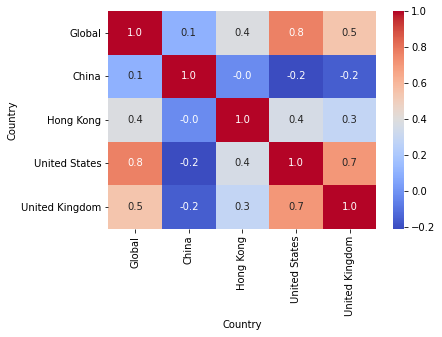

In [213]:
import seaborn as sns
import matplotlib. pyplot as plt 


# By Month
temp_df = country_month_df[country_month_df['Country'].isin(['Global','Hong Kong', 'China', 'United States', 'United Kingdom'])].set_index('Country')
numeric_cols = temp_df.select_dtypes(include=['float64', 'int64']).columns
df_numeric = temp_df[numeric_cols]

# transpose the DataFrame
df_t = df_numeric.T

# compute the correlation matrix
corr_matrix = df_t.corr()

# plot the heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".1f")



In [214]:
corr_df = pd.DataFrame()
for num in range(0,7):
    corr_matrix = df_t[0+num*12:12+num*12].corr()
    corr_df = pd.concat([corr_df, corr_matrix.loc['Hong Kong']], axis=1)

corr_df.columns = ['2017','2018','2019','2020','2021','2022','2023']
corr_df.drop(index='Hong Kong', inplace=True)
corr_df.reset_index(inplace=True)
corr_df.rename(columns={'index': 'Country'}, inplace=True)

melted_df = corr_df.melt(id_vars=['Country'], var_name='Year', value_name='Tone')
melted_df = melted_df.set_index('Country')

fig = px.line(melted_df, x='Year', y='Tone',
              color=melted_df.index,
              title='Correlation of Tone by Month',
              line_shape='spline',
              render_mode='auto')
fig.show()

#### Rolling correlation by Year

In [215]:
corr_df

,Country,2017,2018,2019,2020,2021,2022,2023
0,Global,0.765119,0.224573,0.388028,0.243281,0.542298,0.236445,0.547033
1,China,-0.720268,-0.240522,0.283962,0.257569,0.211060,0.436937,0.209911
2,United States,0.651933,0.569127,0.749454,0.351656,0.369713,0.519720,-0.122517
3,United Kingdom,0.334225,0.454974,0.760601,0.533399,-0.305968,0.603762,0.715789


In [216]:
temp_df = country_year_df[country_month_df['Country'].isin(['Global','Hong Kong', 'China', 'United States', 'United Kingdom'])].set_index('Country')

In [217]:
# Calculate rolling correlation for Hong Kong against other countries
corr_df = pd.DataFrame()
for country in temp_df.index:
    rolling_corr = temp_df.loc['Hong Kong'].rolling(window=3).corr(temp_df.loc[country])
    corr_df = pd.concat([corr_df, rolling_corr], axis=1)
# Print the resulting rolling correlation
corr_df.dropna(inplace=True)
corr_df = corr_df.T
corr_df.reset_index(inplace=True)
corr_df.rename(columns={'index': 'Country'}, inplace=True)
corr_df['Country'] = temp_df.index
corr_df = corr_df[corr_df['Country'] != 'Hong Kong']

melted_df = corr_df.melt(id_vars=['Country'], var_name='Year', value_name='Tone')
melted_df = melted_df.set_index('Country')

fig = px.line(melted_df, x='Year', y='Tone',
              color=melted_df.index,
              title='Rolling Correlation of Tone by Year',
              line_shape='spline',
              render_mode='auto')
fig.show()

In [218]:
# create an empty dictionary to hold the results
results = {}

for year, data in final_results.items():
    results[str(year)] = {}
    for item in data:
        if item['sourcecountry'] == 'Hong Kong':
            domain = item['domain']
            if domain not in results[str(year)]:
                results[str(year)][domain] = {}
                results[str(year)][domain]['tone'] = 0
                results[str(year)][domain]['count'] = 0
            tone = item['tone']
            results[str(year)][domain]['tone'] += tone
            results[str(year)][domain]['count'] += 1

# fill in the results dictionary with the calculated values
for year, domain_data in results.items():
    for domain, data in domain_data.items():
        avg_tone = data['tone'] / data['count']
        results[str(year)][domain]['tone'] = avg_tone

# create a dataframe from the results dictionary
hk_df = pd.DataFrame.from_dict({(i,j): results[i][j] 
                                for i in results.keys() 
                                for j in results[i].keys()}, orient='index')

# Reset the index and rename columns
hk_df.reset_index(inplace=True)
hk_df.rename(columns={'level_0': 'Year', 'level_1': 'Domain'}, inplace=True)

# Calculate the average tone for each domain for each year
hk_df['Average Tone'] = hk_df.groupby(['Domain', 'Year'])['tone'].transform('mean')

# Calculate the total count for each domain for each year
hk_df['Count'] = hk_df.groupby(['Domain', 'Year'])['count'].transform('sum')

# Drop unnecessary columns
hk_df.drop(['tone', 'count'], axis=1, inplace=True)

# # Calculate the mean across all domains for each year
hk_mean = ((hk_df.groupby(['Year','Domain'])['Average Tone'].sum()* hk_df.groupby(['Year','Domain'])['Count'].sum()).reset_index()).groupby('Year')[0].sum()/hk_df.groupby('Year')['Count'].sum()
hk_mean_df = pd.concat([hk_mean,hk_df.groupby('Year')['Count'].sum()],axis=1).reset_index()
hk_mean_df.insert(1, 'Domain', 'Hong Kong')
hk_mean_df = hk_mean_df.rename(columns={ 0: 'Average Tone'})
hk_df = pd.concat([hk_df, hk_mean_df]).sort_values(by=['Year', 'Count'], ascending=[True, False]).reset_index(drop=True)


In [219]:
fig = px.scatter(hk_df,
                 x="Year", y="Average Tone", color="Domain", title="Average Tone per Year by domain", hover_data = ['Count'], color_discrete_map={'Hong Kong': 'Black'})

# Update marker size for "Global" points
for i, country in enumerate(melted_df.index):
    if country == 'Hong Kong':
        fig.update_traces(marker=dict(size=10), selector=dict(mode='markers', name=f'{country}'))


fig.show()

### Visualise distribution of news articles by domain for top countries

#### China

##### Code

In [687]:
# create an empty dictionary to hold the results
results = {}

for year, data in final_results.items():
    results[str(year)] = {}
    for item in data:
        if item['sourcecountry'] == 'China':
            domain = item['domain']
            if domain not in results[str(year)]:
                results[str(year)][domain] = {}
                results[str(year)][domain]['tone'] = 0
                results[str(year)][domain]['count'] = 0
            tone = item['tone']
            results[str(year)][domain]['tone'] += tone
            results[str(year)][domain]['count'] += 1

# fill in the results dictionary with the calculated values
for year, domain_data in results.items():
    for domain, data in domain_data.items():
        avg_tone = data['tone'] / data['count']
        results[str(year)][domain]['tone'] = avg_tone

# create a dataframe from the results dictionary
cn_df = pd.DataFrame.from_dict({(i,j): results[i][j] 
                                for i in results.keys() 
                                for j in results[i].keys()}, orient='index')

# Reset the index and rename columns
cn_df.reset_index(inplace=True)
cn_df.rename(columns={'level_0': 'Year', 'level_1': 'Domain'}, inplace=True)

# Calculate the average tone for each domain for each year
cn_df['Average Tone'] = cn_df.groupby(['Domain', 'Year'])['tone'].transform('mean')

# Calculate the total count for each domain for each year
cn_df['Count'] = cn_df.groupby(['Domain', 'Year'])['count'].transform('sum')

# Drop unnecessary columns
cn_df.drop(['tone', 'count'], axis=1, inplace=True)

grouped = cn_df.groupby(['Year', 'Domain']).sum().reset_index()

# Finding top 10 domains for each year
top_10_domains = (
    grouped.groupby('Year')
    .apply(lambda x: x.nlargest(10, 'Count'))
    .reset_index(drop=True)
)

others = (
    grouped
    .groupby('Year')['Count']
    .sum()
    .reset_index()
)

others2 = (
    top_10_domains
    .groupby('Year')['Count']
    .sum()
    .reset_index()
)

merged_df = others.merge(others2, on='Year', suffixes=('_df1', '_df2'))
merged_df['Count'] = merged_df['Count_df1'] - merged_df['Count_df2']

# Create a new DataFrame with the differences named as 'Others'
others_diff = (
    merged_df.groupby('Year')['Count']
    .sum()
    .reset_index()
)
others_diff['Domain'] = 'Others'

# Concatenate 'Others' differences with 'top_domains_with_others'
top_domains_with_others = pd.concat([top_10_domains, others_diff[['Year', 'Domain', 'Count']]], ignore_index=True)
top_domains_with_others['Domain'] = top_domains_with_others['Domain'].replace('news.xinhuanet.com', 'xinhuanet.com')



##### Plot

In [688]:
colour_dict = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99','#b15928']

# Plotting the barplot
fig = px.bar(top_domains_with_others, x="Year", y="Count", color="Domain", color_discrete_sequence=colour_dict,
             color_discrete_map={'Others': '#f781bf'},
             title="Top 10 China News Domains by Year (Others aggregated)",
             width=1250, height=750, template='plotly_white')

fig.update_layout(title_x=0.05, title_y=0.92)

fig.update_traces(marker_line_width=1.3,marker_line_color="white")

fig.show()

#### United States

##### Code

In [462]:
# create an empty dictionary to hold the results
results = {}

for year, data in final_results.items():
    results[str(year)] = {}
    for item in data:
        if item['sourcecountry'] == 'United States':
            domain = item['domain']
            if domain not in results[str(year)]:
                results[str(year)][domain] = {}
                results[str(year)][domain]['tone'] = 0
                results[str(year)][domain]['count'] = 0
            tone = item['tone']
            results[str(year)][domain]['tone'] += tone
            results[str(year)][domain]['count'] += 1

# fill in the results dictionary with the calculated values
for year, domain_data in results.items():
    for domain, data in domain_data.items():
        avg_tone = data['tone'] / data['count']
        results[str(year)][domain]['tone'] = avg_tone

# create a dataframe from the results dictionary
us_df = pd.DataFrame.from_dict({(i,j): results[i][j] 
                                for i in results.keys() 
                                for j in results[i].keys()}, orient='index')

# Reset the index and rename columns
us_df.reset_index(inplace=True)
us_df.rename(columns={'level_0': 'Year', 'level_1': 'Domain'}, inplace=True)

# Calculate the average tone for each domain for each year
us_df['Average Tone'] = us_df.groupby(['Domain', 'Year'])['tone'].transform('mean')

# Calculate the total count for each domain for each year
us_df['Count'] = us_df.groupby(['Domain', 'Year'])['count'].transform('sum')

# Drop unnecessary columns
us_df.drop(['tone', 'count'], axis=1, inplace=True)

grouped = us_df.groupby(['Year', 'Domain']).sum().reset_index()

# Finding top 10 domains for each year
top_10_domains = (
    grouped.groupby('Year')
    .apply(lambda x: x.nlargest(10, 'Count'))
    .reset_index(drop=True)
)

others = (
    grouped
    .groupby('Year')['Count']
    .sum()
    .reset_index()
)

others2 = (
    top_10_domains
    .groupby('Year')['Count']
    .sum()
    .reset_index()
)

merged_df = others.merge(others2, on='Year', suffixes=('_df1', '_df2'))
merged_df['Count'] = merged_df['Count_df1'] - merged_df['Count_df2']

# Create a new DataFrame with the differences named as 'Others'
others_diff = (
    merged_df.groupby('Year')['Count']
    .sum()
    .reset_index()
)
others_diff['Domain'] = 'Others'

# Concatenate 'Others' differences with 'top_domains_with_others'
top_domains_with_others = pd.concat([top_10_domains, others_diff[['Year', 'Domain', 'Count']]], ignore_index=True)
top_domains_with_others['Domain'] = top_domains_with_others['Domain'].replace('prnewswire.com:443', 'prnewswire.com')
top_domains_with_others['Domain'] = top_domains_with_others['Domain'].replace('breitbart.com:443', 'breitbart.com')

##### Plot

In [464]:
# Plotting the barplot
fig = px.bar(top_domains_with_others, x="Year", y="Count", color="Domain", color_discrete_sequence=colour_dict,
             color_discrete_map={'Others': '#f781bf'},
             title="Top 10 United States News Domains by Year (Others aggregated)",
             width=1250, height=750, template='plotly_white')
fig.update_layout(title_x=0.05, title_y=0.92)

fig.update_traces(marker_line_width=1.3,marker_line_color="white")

fig.show()

#### India

##### Code

In [465]:
# create an empty dictionary to hold the results
results = {}

for year, data in final_results.items():
    results[str(year)] = {}
    for item in data:
        if item['sourcecountry'] == 'India':
            domain = item['domain']
            if domain not in results[str(year)]:
                results[str(year)][domain] = {}
                results[str(year)][domain]['tone'] = 0
                results[str(year)][domain]['count'] = 0
            tone = item['tone']
            results[str(year)][domain]['tone'] += tone
            results[str(year)][domain]['count'] += 1

# fill in the results dictionary with the calculated values
for year, domain_data in results.items():
    for domain, data in domain_data.items():
        avg_tone = data['tone'] / data['count']
        results[str(year)][domain]['tone'] = avg_tone

# create a dataframe from the results dictionary
in_df = pd.DataFrame.from_dict({(i,j): results[i][j] 
                                for i in results.keys() 
                                for j in results[i].keys()}, orient='index')

# Reset the index and rename columns
in_df.reset_index(inplace=True)
in_df.rename(columns={'level_0': 'Year', 'level_1': 'Domain'}, inplace=True)

# Calculate the average tone for each domain for each year
in_df['Average Tone'] = in_df.groupby(['Domain', 'Year'])['tone'].transform('mean')

# Calculate the total count for each domain for each year
in_df['Count'] = in_df.groupby(['Domain', 'Year'])['count'].transform('sum')

# Drop unnecessary columns
in_df.drop(['tone', 'count'], axis=1, inplace=True)

grouped = in_df.groupby(['Year', 'Domain']).sum().reset_index()

# Finding top 10 domains for each year
top_10_domains = (
    grouped.groupby('Year')
    .apply(lambda x: x.nlargest(10, 'Count'))
    .reset_index(drop=True)
)

others = (
    grouped
    .groupby('Year')['Count']
    .sum()
    .reset_index()
)

others2 = (
    top_10_domains
    .groupby('Year')['Count']
    .sum()
    .reset_index()
)

merged_df = others.merge(others2, on='Year', suffixes=('_df1', '_df2'))
merged_df['Count'] = merged_df['Count_df1'] - merged_df['Count_df2']

# Create a new DataFrame with the differences named as 'Others'
others_diff = (
    merged_df.groupby('Year')['Count']
    .sum()
    .reset_index()
)
others_diff['Domain'] = 'Others'

# Concatenate 'Others' differences with 'top_domains_with_others'
top_domains_with_others = pd.concat([top_10_domains, others_diff[['Year', 'Domain', 'Count']]], ignore_index=True)

##### Plot

In [466]:
# Plotting the barplot
fig = px.bar(top_domains_with_others, x="Year", y="Count", color="Domain", color_discrete_sequence=colour_dict,
             color_discrete_map={'Others': '#f781bf'},
             title="Top 10 India News Domains by Year (Others aggregated)",
             width=1250, height=750, template='plotly_white')
fig.update_layout(title_x=0.05, title_y=0.92)

fig.update_traces(marker_line_width=1.3,marker_line_color="white")

fig.show()

#### Hong Kong

##### Code

In [467]:
# create an empty dictionary to hold the results
results = {}

for year, data in final_results.items():
    results[str(year)] = {}
    for item in data:
        if item['sourcecountry'] == 'Hong Kong':
            domain = item['domain']
            if domain not in results[str(year)]:
                results[str(year)][domain] = {}
                results[str(year)][domain]['tone'] = 0
                results[str(year)][domain]['count'] = 0
            tone = item['tone']
            results[str(year)][domain]['tone'] += tone
            results[str(year)][domain]['count'] += 1

# fill in the results dictionary with the calculated values
for year, domain_data in results.items():
    for domain, data in domain_data.items():
        avg_tone = data['tone'] / data['count']
        results[str(year)][domain]['tone'] = avg_tone

# create a dataframe from the results dictionary
hk_df = pd.DataFrame.from_dict({(i,j): results[i][j] 
                                for i in results.keys() 
                                for j in results[i].keys()}, orient='index')

# Reset the index and rename columns
hk_df.reset_index(inplace=True)
hk_df.rename(columns={'level_0': 'Year', 'level_1': 'Domain'}, inplace=True)

# Calculate the average tone for each domain for each year
hk_df['Average Tone'] = hk_df.groupby(['Domain', 'Year'])['tone'].transform('mean')

# Calculate the total count for each domain for each year
hk_df['Count'] = hk_df.groupby(['Domain', 'Year'])['count'].transform('sum')

# Drop unnecessary columns
hk_df.drop(['tone', 'count'], axis=1, inplace=True)

grouped = hk_df.groupby(['Year', 'Domain']).sum().reset_index()

# Finding top 10 domains for each year
top_10_domains = (
    grouped.groupby('Year')
    .apply(lambda x: x.nlargest(10, 'Count'))
    .reset_index(drop=True)
)

others = (
    grouped
    .groupby('Year')['Count']
    .sum()
    .reset_index()
)

others2 = (
    top_10_domains
    .groupby('Year')['Count']
    .sum()
    .reset_index()
)

merged_df = others.merge(others2, on='Year', suffixes=('_df1', '_df2'))
merged_df['Count'] = merged_df['Count_df1'] - merged_df['Count_df2']

# Create a new DataFrame with the differences named as 'Others'
others_diff = (
    merged_df.groupby('Year')['Count']
    .sum()
    .reset_index()
)
others_diff['Domain'] = 'Others'

# Concatenate 'Others' differences with 'top_domains_with_others'
top_domains_with_others = pd.concat([top_10_domains, others_diff[['Year', 'Domain', 'Count']]], ignore_index=True)

##### Plot

In [472]:
colour_dict = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99','#b15928']

# Plotting the barplot
fig = px.bar(top_domains_with_others, x="Year", y="Count", color="Domain", color_discrete_sequence=colour_dict,
             color_discrete_map={'Others': '#f781bf'},
             title="Top 10 Hong Kong News Domains by Year (Others aggregated)",
             width=1250, height=750, template='plotly_white')
fig.update_layout(title_x=0.05, title_y=0.92)

fig.update_traces(marker_line_width=1.3,marker_line_color="white")

fig.show()

#### Pakistan

##### Code

In [479]:
# create an empty dictionary to hold the results
results = {}

for year, data in final_results.items():
    results[str(year)] = {}
    for item in data:
        if item['sourcecountry'] == 'Pakistan':
            domain = item['domain']
            if domain not in results[str(year)]:
                results[str(year)][domain] = {}
                results[str(year)][domain]['tone'] = 0
                results[str(year)][domain]['count'] = 0
            tone = item['tone']
            results[str(year)][domain]['tone'] += tone
            results[str(year)][domain]['count'] += 1

# fill in the results dictionary with the calculated values
for year, domain_data in results.items():
    for domain, data in domain_data.items():
        avg_tone = data['tone'] / data['count']
        results[str(year)][domain]['tone'] = avg_tone

# create a dataframe from the results dictionary
pk_df = pd.DataFrame.from_dict({(i,j): results[i][j] 
                                for i in results.keys() 
                                for j in results[i].keys()}, orient='index')

# Reset the index and rename columns
pk_df.reset_index(inplace=True)
pk_df.rename(columns={'level_0': 'Year', 'level_1': 'Domain'}, inplace=True)

# Calculate the average tone for each domain for each year
pk_df['Average Tone'] = pk_df.groupby(['Domain', 'Year'])['tone'].transform('mean')

# Calculate the total count for each domain for each year
pk_df['Count'] = pk_df.groupby(['Domain', 'Year'])['count'].transform('sum')

# Drop unnecessary columns
pk_df.drop(['tone', 'count'], axis=1, inplace=True)

grouped = pk_df.groupby(['Year', 'Domain']).sum().reset_index()

# Finding top 10 domains for each year
top_10_domains = (
    grouped.groupby('Year')
    .apply(lambda x: x.nlargest(10, 'Count'))
    .reset_index(drop=True)
)

others = (
    grouped
    .groupby('Year')['Count']
    .sum()
    .reset_index()
)

others2 = (
    top_10_domains
    .groupby('Year')['Count']
    .sum()
    .reset_index()
)

merged_df = others.merge(others2, on='Year', suffixes=('_df1', '_df2'))
merged_df['Count'] = merged_df['Count_df1'] - merged_df['Count_df2']

# Create a new DataFrame with the differences named as 'Others'
others_diff = (
    merged_df.groupby('Year')['Count']
    .sum()
    .reset_index()
)
others_diff['Domain'] = 'Others'

# Concatenate 'Others' differences with 'top_domains_with_others'
top_domains_with_others = pd.concat([top_10_domains, others_diff[['Year', 'Domain', 'Count']]], ignore_index=True)

##### Plot

In [480]:
colour_dict = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99','#b15928']

# Plotting the barplot
fig = px.bar(top_domains_with_others, x="Year", y="Count", color="Domain", color_discrete_sequence=colour_dict,
             color_discrete_map={'Others': '#f781bf'},
             title="Top 10 Pakistan News Domains by Year (Others aggregated)",
             width=1250, height=750, template='plotly_white')
fig.update_layout(title_x=0.05, title_y=0.92)

fig.update_traces(marker_line_width=1.3,marker_line_color="white")

fig.show()

#### Malaysia

##### Code

In [481]:
# create an empty dictionary to hold the results
results = {}

for year, data in final_results.items():
    results[str(year)] = {}
    for item in data:
        if item['sourcecountry'] == 'Malaysia':
            domain = item['domain']
            if domain not in results[str(year)]:
                results[str(year)][domain] = {}
                results[str(year)][domain]['tone'] = 0
                results[str(year)][domain]['count'] = 0
            tone = item['tone']
            results[str(year)][domain]['tone'] += tone
            results[str(year)][domain]['count'] += 1

# fill in the results dictionary with the calculated values
for year, domain_data in results.items():
    for domain, data in domain_data.items():
        avg_tone = data['tone'] / data['count']
        results[str(year)][domain]['tone'] = avg_tone

# create a dataframe from the results dictionary
my_df = pd.DataFrame.from_dict({(i,j): results[i][j] 
                                for i in results.keys() 
                                for j in results[i].keys()}, orient='index')

# Reset the index and rename columns
my_df.reset_index(inplace=True)
my_df.rename(columns={'level_0': 'Year', 'level_1': 'Domain'}, inplace=True)

# Calculate the average tone for each domain for each year
my_df['Average Tone'] = my_df.groupby(['Domain', 'Year'])['tone'].transform('mean')

# Calculate the total count for each domain for each year
my_df['Count'] = my_df.groupby(['Domain', 'Year'])['count'].transform('sum')

# Drop unnecessary columns
my_df.drop(['tone', 'count'], axis=1, inplace=True)

grouped = my_df.groupby(['Year', 'Domain']).sum().reset_index()

# Finding top 10 domains for each year
top_10_domains = (
    grouped.groupby('Year')
    .apply(lambda x: x.nlargest(10, 'Count'))
    .reset_index(drop=True)
)

others = (
    grouped
    .groupby('Year')['Count']
    .sum()
    .reset_index()
)

others2 = (
    top_10_domains
    .groupby('Year')['Count']
    .sum()
    .reset_index()
)

merged_df = others.merge(others2, on='Year', suffixes=('_df1', '_df2'))
merged_df['Count'] = merged_df['Count_df1'] - merged_df['Count_df2']

# Create a new DataFrame with the differences named as 'Others'
others_diff = (
    merged_df.groupby('Year')['Count']
    .sum()
    .reset_index()
)
others_diff['Domain'] = 'Others'

# Concatenate 'Others' differences with 'top_domains_with_others'
top_domains_with_others = pd.concat([top_10_domains, others_diff[['Year', 'Domain', 'Count']]], ignore_index=True)

##### Plot

In [482]:

# Plotting the barplot
fig = px.bar(top_domains_with_others, x="Year", y="Count", color="Domain", color_discrete_sequence=colour_dict,
             color_discrete_map={'Others': '#f781bf'},
             title="Top 10 Malaysia News Domains by Year (Others aggregated)",
             width=1250, height=750, template='plotly_white')
fig.update_layout(title_x=0.05, title_y=0.92)

fig.update_traces(marker_line_width=1.3,marker_line_color="white")

fig.show()

#### United Kingdom

##### Code

In [483]:
# create an empty dictionary to hold the results
results = {}

for year, data in final_results.items():
    results[str(year)] = {}
    for item in data:
        if item['sourcecountry'] == 'United Kingdom':
            domain = item['domain']
            if domain not in results[str(year)]:
                results[str(year)][domain] = {}
                results[str(year)][domain]['tone'] = 0
                results[str(year)][domain]['count'] = 0
            tone = item['tone']
            results[str(year)][domain]['tone'] += tone
            results[str(year)][domain]['count'] += 1

# fill in the results dictionary with the calculated values
for year, domain_data in results.items():
    for domain, data in domain_data.items():
        avg_tone = data['tone'] / data['count']
        results[str(year)][domain]['tone'] = avg_tone

# create a dataframe from the results dictionary
uk_df = pd.DataFrame.from_dict({(i,j): results[i][j] 
                                for i in results.keys() 
                                for j in results[i].keys()}, orient='index')

# Reset the index and rename columns
uk_df.reset_index(inplace=True)
uk_df.rename(columns={'level_0': 'Year', 'level_1': 'Domain'}, inplace=True)

# Calculate the average tone for each domain for each year
uk_df['Average Tone'] = uk_df.groupby(['Domain', 'Year'])['tone'].transform('mean')

# Calculate the total count for each domain for each year
uk_df['Count'] = uk_df.groupby(['Domain', 'Year'])['count'].transform('sum')

# Drop unnecessary columns
uk_df.drop(['tone', 'count'], axis=1, inplace=True)

grouped = uk_df.groupby(['Year', 'Domain']).sum().reset_index()

# Finding top 10 domains for each year
top_10_domains = (
    grouped.groupby('Year')
    .apply(lambda x: x.nlargest(10, 'Count'))
    .reset_index(drop=True)
)

others = (
    grouped
    .groupby('Year')['Count']
    .sum()
    .reset_index()
)

others2 = (
    top_10_domains
    .groupby('Year')['Count']
    .sum()
    .reset_index()
)

merged_df = others.merge(others2, on='Year', suffixes=('_df1', '_df2'))
merged_df['Count'] = merged_df['Count_df1'] - merged_df['Count_df2']

# Create a new DataFrame with the differences named as 'Others'
others_diff = (
    merged_df.groupby('Year')['Count']
    .sum()
    .reset_index()
)
others_diff['Domain'] = 'Others'

# Concatenate 'Others' differences with 'top_domains_with_others'
top_domains_with_others = pd.concat([top_10_domains, others_diff[['Year', 'Domain', 'Count']]], ignore_index=True)

##### Plot

In [484]:

# Plotting the barplot
fig = px.bar(top_domains_with_others, x="Year", y="Count", color="Domain", color_discrete_sequence=colour_dict,
             color_discrete_map={'Others': '#f781bf'},
             title="Top 10 United Kingdom News Domains by Year (Others aggregated)",
             width=1250, height=750, template='plotly_white')
fig.update_layout(title_x=0.05, title_y=0.92)

fig.update_traces(marker_line_width=1.3,marker_line_color="white")

fig.show()

### Word Bar Chart

In [562]:
count_before = 0
count_after = 0

for year in range(2017, 2020):
    year_str = str(year)

    for num in range(len(final_results[year_str])):
        if final_results[year_str][num]['sourcecountry'] == 'Hong Kong':
            if len(final_results[year_str][num]['text'].split()) > 40:
                text = final_results[year_str][num]['text']
                count_before+=1

for year in range(2020, 2024):
    year_str = str(year)

    for num in range(len(final_results[year_str])):
        if final_results[year_str][num]['sourcecountry'] == 'Hong Kong':
            if len(final_results[year_str][num]['text'].split()) > 40:
                text = final_results[year_str][num]['text']
                count_after+=1


In [564]:
print(count_before)
print(count_after)

1396
261


In [565]:
texts_by_year_before = []
texts_by_year_after = []

for year in range(2017, 2020):
    year_str = str(year)

    for num in range(len(final_results[year_str])):
        if final_results[year_str][num]['sourcecountry'] == 'Hong Kong':
            if len(final_results[year_str][num]['text'].split()) > 40:
                text = final_results[year_str][num]['text']
                texts_by_year_before.append(text)

for year in range(2020, 2024):
    year_str = str(year)

    for num in range(len(final_results[year_str])):
        if final_results[year_str][num]['sourcecountry'] == 'Hong Kong':
            if len(final_results[year_str][num]['text'].split()) > 40:
                text = final_results[year_str][num]['text']
                texts_by_year_after.append(text)


In [570]:
import pandas as pd
from collections import Counter
import re
from nltk.corpus import stopwords
import nltk

# Download NLTK stopwords if not already downloaded
nltk.download('stopwords')

# Combine all text into a single string
all_text = ' '.join(texts_by_year_before)

# Tokenize words
words = re.findall(r'\b\w+\b', all_text.lower())  # Convert to lowercase for case-insensitive counting

# Get English stopwords
stop_words = set(stopwords.words('english'))

# Filter out stopwords
filtered_words = [word for word in words if word not in stop_words]

# Count occurrences of each word
word_counts = Counter(filtered_words)

# Create a DataFrame from the word counts
word_counts_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Count'])

# Sort the DataFrame by count in descending order
word_counts_df = word_counts_df.sort_values(by='Count', ascending=False).reset_index(drop=True)

print(word_counts_df.head(10))  # Display the top 10 words and their counts


[nltk_data] Downloading package stopwords to /Users/le/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


      Word  Count
0    china  11607
1     said   5503
2       us   4894
3  chinese   4651
4     road   3998
5     belt   3483
6     hong   3188
7     kong   3182
8  beijing   2874
9    trade   2404


In [571]:
import pandas as pd
from collections import Counter
import re
from nltk.corpus import stopwords
import nltk

# Download NLTK stopwords if not already downloaded
nltk.download('stopwords')

# Combine all text into a single string
all_text = ' '.join(texts_by_year_after)

# Tokenize words
words = re.findall(r'\b\w+\b', all_text.lower())  # Convert to lowercase for case-insensitive counting

# Get English stopwords
stop_words = set(stopwords.words('english'))

# Filter out stopwords
filtered_words = [word for word in words if word not in stop_words]

# Count occurrences of each word
word_counts = Counter(filtered_words)

# Create a DataFrame from the word counts
word_counts_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Count'])

# Sort the DataFrame by count in descending order
word_counts_df = word_counts_df.sort_values(by='Count', ascending=False).reset_index(drop=True)

print(word_counts_df.head(10))  # Display the top 10 words and their counts


        Word  Count
0      china   2080
1       said   1093
2    chinese    901
3       road    654
4         us    618
5       hong    602
6       belt    601
7       kong    601
8  countries    557
9   economic    433


[nltk_data] Downloading package stopwords to /Users/le/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Data Scraping

### Newspaper3k

In [ ]:
for year in range(2017,2024):
    year = str(year)
    for num in range(0,len(final_results[year])):
        if final_results[year][num]['sourcecountry'] == 'Hong Kong':
            url = final_results[year][num]['url']
            article = newspaper.Article(url=url, language='en')
            article.download()
            try:
                article.parse()
            except:
                pass
            final_results[year][num]['text'] = article.text

In [65]:
invalid_articles_per_domain = []
type(invalid_articles_per_domain)

list

In [74]:
invalid_articles_per_domain = {}
for year in range(2017,2024):
    year = str(year)
    for num in range(0,len(final_results[year])):
        if final_results[year][num]['sourcecountry'] == 'Hong Kong':
            if len(final_results[year][num]['text'].split()) <=40:
                if final_results[year][num]['domain'] != "7thspace.com":
                    print(final_results[year][num]['url'])
                try:
                    invalid_articles_per_domain[final_results[year][num]['domain']] +=1
                except:
                    invalid_articles_per_domain[final_results[year][num]['domain']] = 1

for key, value in invalid_articles_per_domain.items():
    print(f"{key}: {value}")

http://www.squarefoot.com.hk/home-blog/article/2835/the-last-policy-address-of-cy-leung
http://www.hongkongherald.com/index.php/sid/252335657
http://www.ejinsight.com/20170315-why-beijing-is-talking-patriotic-education-ahead-of-election/
http://www.ejinsight.com/20170410-hna-group-offers-to-buy-singapore-logistics-firm-cwt/
http://www.ejinsight.com/20170410-united-pv-rides-chinas-belt-and-road-push/
http://www.ejinsight.com/20170512-belt-and-road-initiative-is-not-just-about-infrastructure/
http://www.hongkongherald.com/article/253357655/data-center-giant-makes-the-rounds
http://www.ejinsight.com/20170605-we-ve-got-you-covered-things-you-didn-t-know-about-huawei/
http://www.ejinsight.com/20170717-hk-must-change-mentality-to-seize-belt-and-road-opportunities/
http://www.ejinsight.com/20170724-why-chinas-private-firms-may-go-slow-on-overseas-deals/
http://www.ejinsight.com/20170725-china-s-overseas-buying-spree-coming-to-an-end/
http://www.ejinsight.com/20170809-tawang-crisis-just-a-side

### Requests and BeautifulSoup

#### Hong Kong

In [121]:
import requests
from bs4 import BeautifulSoup
for year in range(2017,2024):
    year = str(year)
    for num in range(0,len(final_results[year])):
        if final_results[year][num]['sourcecountry'] == 'Hong Kong':
            if len(final_results[year][num]['text'].split()) <=40:
                if final_results[year][num]['domain'] == 'hongkongherald.com':
                    try:
                        res = requests.get(final_results[year][num]['url'], headers={'User-Agent': 'Mozilla/5.0'})
                        soup_data = BeautifulSoup(res.text, 'html.parser')
                        article_content = soup_data.find('div', class_='banner-text')
                        original_text = article_content.get_text()
                        cleaned_text = original_text.replace('\n', ' ')
                        cleaned_text = cleaned_text.encode('utf-8').decode('unicode_escape')
                        final_results[year][num]['text'] = cleaned_text
                    except:
                        print(year,num)

2017 4376
2017 7878


#### China (news.xinhuanet.com)

In [647]:
xinhua_articles = []

In [644]:
xinhua_articles_old = []
for num in range(0,len(final_results['2017'])):
    if final_results['2017'][num]['sourcecountry'] == 'China':
        if final_results['2017'][num]['domain'] == 'news.xinhuanet.com':
            xinhua_articles_old.append(final_results['2017'][num])

In [648]:
from tqdm import tqdm
import requests
from bs4 import BeautifulSoup
year = str(2017)
for num in tqdm(range(0,len(xinhua_articles_old))):
    try:
        res = requests.get(xinhua_articles_old[num]['url'], headers={'User-Agent': 'Mozilla/5.0'})
        soup_data = BeautifulSoup(res.text, 'html.parser')
        article_content = soup_data.find('div', class_='artTxt')
        original_text = article_content.get_text()
        cleaned_text = original_text.replace('\n', ' ')
        cleaned_text = cleaned_text.encode('utf-8').decode('unicode_escape')
        if 'belt and road' in cleaned_text.lower() or 'one belt one road' in cleaned_text.lower():
            xinhua_articles.append(xinhua_articles_old[num])
    except:
        pass

100%|██████████| 5061/5061 [1:09:05<00:00,  1.22it/s]


In [660]:
print('Total news.xinhuanet.com Articles : ', len(xinhua_articles_old))
print('Total valid news.xinhuanet.com Articles: ', len(xinhua_articles))

Total news.xinhuanet.com Articles :  5061
Total valid news.xinhuanet.com Articles:  109


In [663]:
final_results['2017'] = [article for article in final_results['2017'] if article['domain'] != 'news.xinhuanet.com']

# Append xinhua_articles to final_results['2017']
final_results['2017'].extend(xinhua_articles)

In [668]:
#save final_results
#with open('./Final Data/3 - final_data.json', 'w', encoding='utf-8') as f:
        #json.dump(final_results, f, indent=4, default=str)

### Results

In [128]:
x = 0
y = 0
for year in range(2017,2024):
    year = str(year)
    x1 = 0
    y1= 0
    for num in range(0,len(final_results[year])):
        if final_results[year][num]['sourcecountry'] == 'Hong Kong':
            y1+=1
            if len(final_results[year][num]['text'].split()) <=40:
                # print(final_results[year][num]['text'])
                #print(year,num, final_results[year][num]['tone'])
                x1+=1
    print('Total Hong Kong Articles for ', year, ': ', y1)
    print('Total invalid Hong Kong Articles for ', year, ': ', x1)
    x+=x1
    y+=y1

print('Total Hong Kong Articles : ', y)
print('Total invalid Hong Kong Articles: ', x)

Total Hong Kong Articles for  2017 :  690
Total invalid Hong Kong Articles for  2017 :  116
Total Hong Kong Articles for  2018 :  686
Total invalid Hong Kong Articles for  2018 :  82
Total Hong Kong Articles for  2019 :  237
Total invalid Hong Kong Articles for  2019 :  19
Total Hong Kong Articles for  2020 :  55
Total invalid Hong Kong Articles for  2020 :  1
Total Hong Kong Articles for  2021 :  72
Total invalid Hong Kong Articles for  2021 :  4
Total Hong Kong Articles for  2022 :  64
Total invalid Hong Kong Articles for  2022 :  1
Total Hong Kong Articles for  2023 :  82
Total invalid Hong Kong Articles for  2023 :  6
Total Hong Kong Articles :  1886
Total invalid Hong Kong Articles:  229


In [154]:
valid_articles_per_domain = {}
for year in range(2017,2024):
    year = str(year)
    for num in range(0,len(final_results[year])):
        if final_results[year][num]['sourcecountry'] == 'Hong Kong':
            if len(final_results[year][num]['text'].split()) > 40 :
                if final_results[year][num]['domain'] == "rthk.hk":
                    print(final_results[year][num])
                try:
                    valid_articles_per_domain[final_results[year][num]['domain']] +=1
                except:
                    valid_articles_per_domain[final_results[year][num]['domain']] = 1

for key, value in valid_articles_per_domain.items():
    print(f"{key}: {value}")

{'title': '香港電台網站', 'url': 'http://www.rthk.hk/radio/radio3/programme/money_talk/episode/423789', 'date': '20170411', 'tone': 0, 'domain': 'rthk.hk', 'sourcecountry': 'Hong Kong', 'text': "Le Xia, Asia Chief Economist at BBVA, tells Carolyn Wright that it’s difficult for Evergrande bond holders to have their money back. He expects China's PMI this month to stabilise after so many stimulus from the government. Andrew Freris, CEO of Ecognosis Advisory, says he expects China and India are going to get big in the domestic tourism market.\n\n", 'tone2': -1.2834711073020277, 'tone1': 0.3243110811061862}
{'title': '香港電台網站 : 第三台', 'url': 'http://www.rthk.hk/radio/radio3/programme/backchat/episode/423773', 'date': '20170426', 'tone': -1, 'domain': 'rthk.hk', 'sourcecountry': 'Hong Kong', 'text': 'At 9:55, we get the latest on the Asian Games.9:05am-9:55am: National Day "Golden Week" tourism rush\n\n9:05am-9:15am: Annie Fonda, Executive Director, Travel Industry Authority\n\n9:15am-9:30am: Haiya

In [677]:
#get total count of final_results
count = 0
for year in range(2017,2024):
    count += len(final_results[str(year)])
print(f"Total number of articles: {count}")

unique_domains = set()

# Loop through each year's data and extract unique domains
for year_data in final_results.values():
    for entry in year_data:
        unique_domains.add(entry['domain'])

total_unique_domains = len(unique_domains)
print(f"Total number of unique domains across the dataset: {total_unique_domains}")

unique_countries = set()

for year_data in final_results.values():
    for entry in year_data:
        unique_countries.add(entry['sourcecountry'])

total_unique_countries = len(unique_countries)
print(f"Total number of unique countries across the dataset: {total_unique_countries}")

Total number of articles: 85982
Total number of unique domains across the dataset: 3485
Total number of unique countries across the dataset: 161


In [130]:
#with open('./Final Data/5 - with_text2.json', 'w', encoding='utf-8') as f:
        #json.dump(final_results, f, indent=4, default=str)

## Sentiment Analysis

In [ ]:
#open json file
with open('./Final Data/5 - with_text2.json') as f:
        final_results = json.load(f)


In [131]:
hong_kong_sentiment_scores = []

# Iterate through each year and each entry for Hong Kong
for year in range(2017, 2024):
    year = str(year)
    for entry in final_results[year]:
        if entry['sourcecountry'] == 'Hong Kong':
            # Assuming 'tone' is the key for the sentiment score
            hong_kong_sentiment_scores.append(entry['tone'])

# Calculate the min and max for Hong Kong sentiment scores
min_sentiment_hong_kong = min(hong_kong_sentiment_scores)
max_sentiment_hong_kong = max(hong_kong_sentiment_scores)

print("Min Sentiment for Hong Kong:", min_sentiment_hong_kong)
print("Max Sentiment for Hong Kong:", max_sentiment_hong_kong)

Min Sentiment for Hong Kong: -24
Max Sentiment for Hong Kong: 16


### Vader

#### Code

In [667]:
analyzer = SentimentIntensityAnalyzer()
stop_words = set(stopwords.words('english'))
tone2_values = []
tone1_values = []

for year in range(2017,2024):
    year = str(year)
    for num in range(0,len(final_results[year])):
        if final_results[year][num]['sourcecountry'] == 'Hong Kong':
            if len(final_results[year][num]['text'].split()) > 40:
                tokens = word_tokenize(final_results[year][num]['text'].lower())
                tokens = [t for t in tokens if t not in stop_words]
                vs = analyzer.polarity_scores(' '.join(tokens))
                final_results[year][num]['tone2'] = vs['compound']

                # Store 'tone2' and 'tone1' values for normalization
                tone2_values.append(vs['compound'])
                tone1_values.append(final_results[year][num]['tone'])

In [133]:
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
tone1_values_standardized = scaler.fit_transform(np.array(tone1_values).reshape(-1, 1)).flatten()
tone2_values_standardized = scaler.fit_transform(np.array(tone2_values).reshape(-1, 1)).flatten()

# Calculate Pearson correlation coefficient for standardized variables
correlation_coefficient, _ = pearsonr(tone1_values_standardized, tone2_values_standardized)

# Print the correlation coefficient
print("Pearson Correlation Coefficient (after standardization):", correlation_coefficient)

Pearson Correlation Coefficient (after standardization): 0.535598475899005


In [134]:
x=0
for year in range(2017,2024):
    year = str(year)
    for num in range(0,len(final_results[year])):
        if final_results[year][num]['sourcecountry'] == 'Hong Kong':
            try:
                final_results[year][num]['tone2']
                final_results[year][num]['tone2']= tone2_values_standardized[x]
                final_results[year][num]['tone1']= tone1_values_standardized[x]
                x+=1
            except:
                pass


#### Histogram

In [135]:
filtered_data = []
for year, articles in final_results.items():
    for article in articles:
        if article['sourcecountry'] == 'Hong Kong':
            try:
                filtered_data.append({'year': year, 'tone': article['tone2']})
            except:
                pass

# Create a DataFrame from the filtered data
df = pd.DataFrame(filtered_data)

# Plot the histogram
fig = px.histogram(df, x='tone', animation_frame="year",title='Histogram of Tone for Articles from Hong Kong (Tone 2)')
fig.show()

#### Scatterplot (VADER)

In [136]:
country_df2 = pd.DataFrame(columns=['Average Tone', 'Count','Year'])
country_df2["Count"]=country_df2["Count"].astype(float)
for year in range(2017,2024):
    count = {}
    count['Average Tone'] = 0
    count['Count'] = 0
    year = str(year)
    for num in range(len(final_results[year])):
        try:
            final_results[year][num]['tone2']
            count['Count'] +=1
            count['Average Tone'] += final_results[year][num]['tone2']
            
        except:
            pass

    df = pd.DataFrame({'Average Tone': count['Average Tone'], 'Count': count['Count']}, index=[0])
    df['Year'] = year
    country_df2= pd.concat([country_df2,df])

for num in range(len(country_df2)):
    country_df2.iat[num,0] = country_df2.iat[num,0] / country_df2.iat[num,1]

country_df2.index +=1

fig = px.scatter(country_df2,
                 x="Year", y="Average Tone", title="Average Tone per Year (VADER)", hover_data = ['Count'])


fig.show()


#### Scatterplot (GDELT)

In [140]:
country_df2 = pd.DataFrame(columns=['Average Tone', 'Count','Year'])
country_df2["Count"]=country_df2["Count"].astype(float)
for year in range(2017,2024):
    count = {}
    count['Average Tone'] = 0
    count['Count'] = 0
    year = str(year)
    for num in range(len(final_results[year])):
        try:
            final_results[year][num]['tone1']
            count['Count'] +=1
            count['Average Tone'] += final_results[year][num]['tone1']
            
        except:
            pass

    df = pd.DataFrame({'Average Tone': count['Average Tone'], 'Count': count['Count']}, index=[0])
    df['Year'] = year
    country_df2= pd.concat([country_df2,df])

for num in range(len(country_df2)):
    country_df2.iat[num,0] = country_df2.iat[num,0] / country_df2.iat[num,1]

country_df2.index +=1

fig = px.scatter(country_df2,
                 x="Year", y="Average Tone", title="Average Tone per Year (GDELT)", hover_data = ['Count'])


fig.show()


### TextBlob

#### Code

In [142]:
tone2_values = []
tone1_values = []

stop_words = set(stopwords.words('english'))

for year in range(2017,2024):
    year = str(year)
    for num in range(0,len(final_results[year])):
        if final_results[year][num]['sourcecountry'] == 'Hong Kong':
            if len(final_results[year][num]['text'].split()) > 40:
                tokens = word_tokenize(final_results[year][num]['text'].lower())
                tokens = [t for t in tokens if t not in stop_words]
                blob = TextBlob(' '.join(tokens))
                blob = TextBlob(final_results[year][num]['text'])
                
                sentiment = blob.sentiment
                final_results[year][num]['tone2'] = sentiment.polarity

                # Store 'tone2' values for normalization
                tone2_values.append(sentiment.polarity)
                tone1_values.append(final_results[year][num]['tone'])

In [143]:
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
tone1_values_standardized = scaler.fit_transform(np.array(tone1_values).reshape(-1, 1)).flatten()
tone2_values_standardized = scaler.fit_transform(np.array(tone2_values).reshape(-1, 1)).flatten()

# Calculate Pearson correlation coefficient for standardized variables
correlation_coefficient, _ = pearsonr(tone1_values_standardized, tone2_values_standardized)

# Print the correlation coefficient
print("Pearson Correlation Coefficient (after standardization):", correlation_coefficient)

Pearson Correlation Coefficient (after standardization): 0.4038871519712625


In [144]:
x=0
for year in range(2017,2024):
    year = str(year)
    for num in range(0,len(final_results[year])):
        if final_results[year][num]['sourcecountry'] == 'Hong Kong':
            try:
                final_results[year][num]['tone2']
                final_results[year][num]['tone2']= tone2_values_standardized[x]
                x+=1
            except:
                pass


#### Histogram

In [145]:
filtered_data = []
for year, articles in final_results.items():
    for article in articles:
        if article['sourcecountry'] == 'Hong Kong':
            try:
                filtered_data.append({'year': year, 'tone': article['tone2']})
            except:
                pass

# Create a DataFrame from the filtered data
df = pd.DataFrame(filtered_data)

# Plot the histogram
fig = px.histogram(df, x='tone', animation_frame="year",title='Histogram of Tone for Articles from Hong Kong (Tone 2)')
fig.show()

#### Scatterplot (TextBlob)

In [146]:
country_df2 = pd.DataFrame(columns=['Average Tone', 'Count','Year'])
country_df2["Count"]=country_df2["Count"].astype(float)
for year in range(2017,2024):
    count = {}
    count['Average Tone'] = 0
    count['Count'] = 0
    year = str(year)
    for num in range(len(final_results[year])):
        try:
            final_results[year][num]['tone2']
            count['Count'] +=1
            count['Average Tone'] += final_results[year][num]['tone2']
            
        except:
            pass

    df = pd.DataFrame({'Average Tone': count['Average Tone'], 'Count': count['Count']}, index=[0])
    df['Year'] = year
    country_df2= pd.concat([country_df2,df])

for num in range(len(country_df2)):
    country_df2.iat[num,0] = country_df2.iat[num,0] / country_df2.iat[num,1]

country_df2.index +=1



fig = px.scatter(country_df2,
                 x="Year", y="Average Tone", title="Average Tone per Year (TextBlob)", hover_data = ['Count'])


fig.show()


## Word Cloud

In [749]:
texts_by_year = {}

for year in range(2017, 2024):
    year_str = str(year)
    texts_by_year[year_str] = []

    for num in range(len(final_results[year_str])):
        if final_results[year_str][num]['sourcecountry'] == 'Hong Kong':
            if len(final_results[year_str][num]['text'].split()) > 40:
                text = final_results[year_str][num]['text']
                texts_by_year[year_str].append(text)


### Visualise Word Cloud

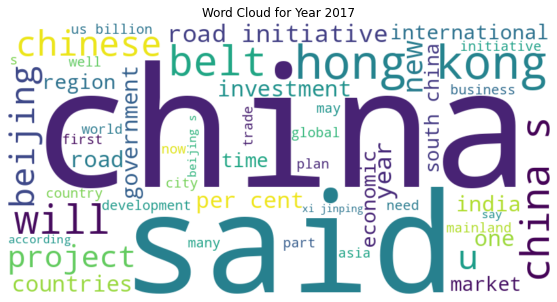

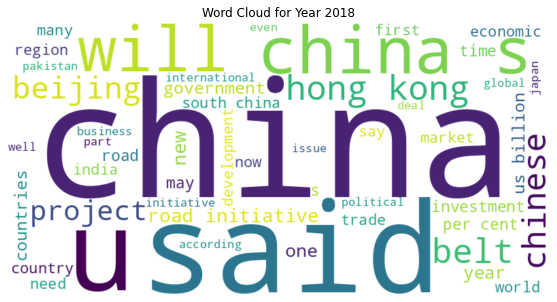

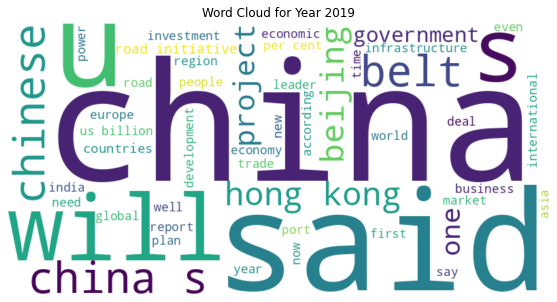

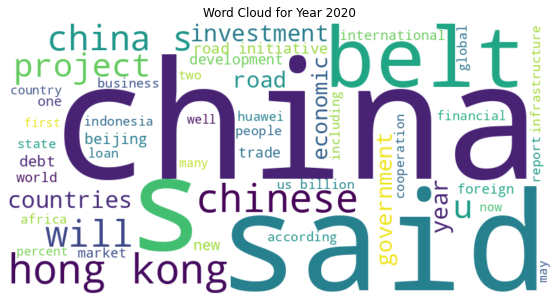

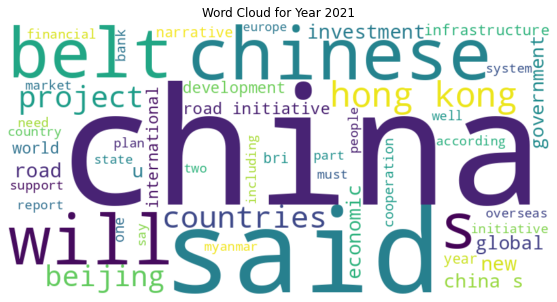

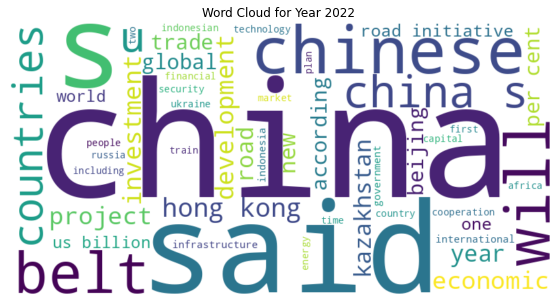

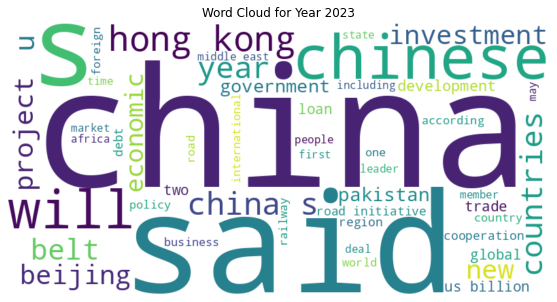

In [10]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Function to preprocess the text
def preprocess_text(text):
    # Add your preprocessing steps here (lowercasing, removing stopwords, etc.)
    # Example: lowercasing
    return text.lower()

# Generate word cloud for each year
for year, data in texts_by_year.items():
    text_data = ' '.join(preprocess_text(entry) for entry in data)
    
    # Generate the WordCloud object
    wordcloud = WordCloud(width=800, height=400, max_words=50, random_state=1,background_color='white', stopwords = STOPWORDS, collocations=True).generate(text_data)
    
    # Display the WordCloud for each year
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Year {year}')
    plt.axis('off')
    plt.show()


### Word Bar Chart

In [752]:
def combine_sentences(sentences):
  combined_string = ""
  for sentence in sentences:
    combined_string += sentence + " "
  return combined_string

#create function to get a DataFrame
def get_df(input_text):
    #import stop_words
    stop_words = stopwords.words('english')
    stop_words.extend(['said', 'belt', 'road', '-', '–', 'also', 'new', 'would', 'initiative', 'two', 'one', 'could'])
    list_words = input_text.lower().split(' ')
    set_words_full = list(set(list_words))
    
    #remove stop words
    set_words = [i for i in set_words_full if i not in stop_words]
    
    #count each word
    count_words = [list_words.count(i) for i in set_words]
    
    #create DataFrame
    df = pd.DataFrame(zip(set_words, count_words), columns=['words','count'])
    df.sort_values('count', ascending=False, inplace=True)
    df.reset_index(drop=True, inplace=True)
    return df

#create function to get a color dictionary
def get_colordict(palette,number,start):
    pal = list(sns.color_palette(palette=palette, n_colors=number).as_hex())
    color_d = dict(enumerate(pal, start=start))
    return color_d

In [915]:
#Get count of articles for 2017-2019 and 2020-2023
count_before = len(texts_by_year['2017']) + len(texts_by_year['2018']) + len(texts_by_year['2019'])
count_after = len(texts_by_year['2020']) + len(texts_by_year['2021']) + len(texts_by_year['2022']) + len(texts_by_year['2023'])
print("Number of articles for period before: ", count_before)
print("Number of articles for period after: ", count_after)


Number of articles for period before:  1392
Number of articles for period after:  224


In [ ]:
text_before = ""
for year in range(2017,2020):
   text_before = text_before +" "+ combine_sentences(texts_by_year[str(year)])

text_after = ""
for year in range(2020,2024):
   text_after = text_after +" "+ combine_sentences(texts_by_year[str(year)])


In [753]:
df_words_before = get_df(text_before)
df_words_before.head(10)

,words,count
0,china,5749
1,chinese,4060
2,hong,2886
3,china’s,2576
4,us,2494
5,kong,2110
6,trade,2032
7,economic,1879
8,countries,1486
9,beijing,1472


In [754]:
df_words_after = get_df(text_after)
df_words_after.head(10)

,words,count
0,china,799
1,chinese,609
2,hong,453
3,economic,358
4,countries,350
5,china’s,347
6,kong,320
7,global,280
8,development,267
9,international,243


In [755]:
df_words_before['fraction'] = df_words_before['count'] / df_words_before['count'].sum()
df_words_after['fraction'] = df_words_after['count'] / df_words_after['count'].sum()


In [764]:
# Filter the DataFrame for 'china' and 'chinese'
filtered_df = df_words_before[df_words_before['words'].isin(['china', 'chinese'])]

# Reset the index if needed
filtered_df.reset_index(inplace=True)

# Create a new DataFrame 'df_union_before'
df_union_before = filtered_df.pivot(columns='words', values=['count', 'fraction'])


In [885]:
df_union_before = df_words_before.copy()
df_union_after = df_words_after.copy()

#### Combine similar words together

##### china: china, chinese, china’s, beijing, beijing’s, china,

In [886]:
# Replace 'china' with 'china, chinese' in the 'words' column
df_union_before['words'] = df_union_before['words'].replace(['china', 'chinese', "china’s", 'beijing', "beijing’s", 'china,'], 'china')

# Group by 'words', summing 'count' and 'fraction', and keep only one row for 'china, chinese'
df_union_before = df_union_before.groupby('words').agg({'count': 'sum', 'fraction': 'sum'}).sort_values('count', ascending=False).reset_index()

# Replace 'china' with 'china, chinese' in the 'words' column
df_union_after['words'] = df_union_after['words'].replace(['china', 'chinese', "china’s", 'beijing', "beijing’s", 'china,'], 'china')

# Group by 'words', summing 'count' and 'fraction', and keep only one row for 'china, chinese'
df_union_after = df_union_after.groupby('words').agg({'count': 'sum', 'fraction': 'sum'}).sort_values('count', ascending=False).reset_index()

##### hongkong: hong, kong

In [887]:
# Replace 'china' with 'china, chinese' in the 'words' column
df_union_before['words'] = df_union_before['words'].replace(['hong', 'kong'], 'hongkong')

# Group by 'words', summing 'count' and 'fraction', and keep only one row for 'china, chinese'
df_union_before = df_union_before.groupby('words').agg({'count': 'sum', 'fraction': 'sum'}).sort_values('count', ascending=False).reset_index()

# Replace 'china' with 'china, chinese' in the 'words' column
df_union_after['words'] = df_union_after['words'].replace(['hong', 'kong'], 'hongkong')

# Group by 'words', summing 'count' and 'fraction', and keep only one row for 'china, chinese'
df_union_after = df_union_after.groupby('words').agg({'count': 'sum', 'fraction': 'sum'}).sort_values('count', ascending=False).reset_index()

##### unitedstates: us, united, states, america

In [888]:
# Replace 'china' with 'china, chinese' in the 'words' column
df_union_before['words'] = df_union_before['words'].replace(['us', 'united', 'states', 'america'], 'unitedstates')

# Group by 'words', summing 'count' and 'fraction', and keep only one row for 'china, chinese'
df_union_before = df_union_before.groupby('words').agg({'count': 'sum', 'fraction': 'sum'}).sort_values('count', ascending=False).reset_index()

# Replace 'china' with 'china, chinese' in the 'words' column
df_union_after['words'] = df_union_after['words'].replace(['us', 'united', 'states', 'america'], 'unitedstates')

# Group by 'words', summing 'count' and 'fraction', and keep only one row for 'china, chinese'
df_union_after = df_union_after.groupby('words').agg({'count': 'sum', 'fraction': 'sum'}).sort_values('count', ascending=False).reset_index()

##### economic: economic, trade, investment, business, companies, financial

In [889]:
# Replace 'china' with 'china, chinese' in the 'words' column
df_union_before['words'] = df_union_before['words'].replace(['economic', 'trade', 'investment', 'business', 'companies', 'financial'], 'economic')

# Group by 'words', summing 'count' and 'fraction', and keep only one row for 'china, chinese'
df_union_before = df_union_before.groupby('words').agg({'count': 'sum', 'fraction': 'sum'}).sort_values('count', ascending=False).reset_index()

# Replace 'china' with 'china, chinese' in the 'words' column
df_union_after['words'] = df_union_after['words'].replace(['economic', 'trade', 'investment', 'business', 'companies', 'financial'], 'economic')

# Group by 'words', summing 'count' and 'fraction', and keep only one row for 'china, chinese'
df_union_after = df_union_after.groupby('words').agg({'count': 'sum', 'fraction': 'sum'}).sort_values('count', ascending=False).reset_index()

##### international: international, foreign, global, world, overseas, countries

In [890]:
# Replace 'china' with 'china, chinese' in the 'words' column
df_union_before['words'] = df_union_before['words'].replace(['international', 'foreign', 'global', 'world', 'overseas', 'countries'], 'international')

# Group by 'words', summing 'count' and 'fraction', and keep only one row for 'china, chinese'
df_union_before = df_union_before.groupby('words').agg({'count': 'sum', 'fraction': 'sum'}).sort_values('count', ascending=False).reset_index()

# Replace 'china' with 'china, chinese' in the 'words' column
df_union_after['words'] = df_union_after['words'].replace(['international', 'foreign', 'global', 'world', 'overseas', 'countries'], 'international')

# Group by 'words', summing 'count' and 'fraction', and keep only one row for 'china, chinese'
df_union_after = df_union_after.groupby('words').agg({'count': 'sum', 'fraction': 'sum'}).sort_values('count', ascending=False).reset_index()

##### infrastructure: infrastructure, development, projects, project, railway

In [891]:
# Replace 'china' with 'china, chinese' in the 'words' column
df_union_before['words'] = df_union_before['words'].replace(['infrastructure', 'development', 'projects', 'project', 'railway'], 'infrastructure')

# Group by 'words', summing 'count' and 'fraction', and keep only one row for 'china, chinese'
df_union_before = df_union_before.groupby('words').agg({'count': 'sum', 'fraction': 'sum'}).sort_values('count', ascending=False).reset_index()

# Replace 'china' with 'china, chinese' in the 'words' column
df_union_after['words'] = df_union_after['words'].replace(['infrastructure', 'development', 'projects', 'project', 'railway'], 'infrastructure')

# Group by 'words', summing 'count' and 'fraction', and keep only one row for 'china, chinese'
df_union_after = df_union_after.groupby('words').agg({'count': 'sum', 'fraction': 'sum'}).sort_values('count', ascending=False).reset_index()

##### debt: debt, trap, traps, loans, loan

In [892]:
# Replace 'china' with 'china, chinese' in the 'words' column
df_union_before['words'] = df_union_before['words'].replace(['debt', 'trap', 'traps', 'loans', 'loan', 'debts'], 'debt')

# Group by 'words', summing 'count' and 'fraction', and keep only one row for 'china, chinese'
df_union_before = df_union_before.groupby('words').agg({'count': 'sum', 'fraction': 'sum'}).sort_values('count', ascending=False).reset_index()

# Replace 'china' with 'china, chinese' in the 'words' column
df_union_after['words'] = df_union_after['words'].replace(['debt', 'trap', 'traps', 'loans', 'loan', 'debts'], 'debt')

# Group by 'words', summing 'count' and 'fraction', and keep only one row for 'china, chinese'
df_union_after = df_union_after.groupby('words').agg({'count': 'sum', 'fraction': 'sum'}).sort_values('count', ascending=False).reset_index()

#### Choose union of top 10 words of each period

In [893]:
# Drop the row (photo:, per, last)
df_union_before = df_union_before.drop(range(9, 12))
df_union_before.head(10)

,words,count,fraction
0,china,15208,0.030487
1,economic,7719,0.015474
2,international,6815,0.013662
3,hongkong,5003,0.010029
4,infrastructure,4507,0.009035
5,unitedstates,3656,0.007329
6,government,1370,0.002746
7,president,1299,0.002604
8,south,1289,0.002584
12,xi,1043,0.002091


In [894]:
# Drop the row (last, including, according)
df_union_after = df_union_after.drop(range(9, 12))
df_union_after.head(10)

,words,count,fraction
0,china,2080,0.027446
1,international,1373,0.018117
2,economic,1130,0.014910
3,infrastructure,947,0.012496
4,hongkong,774,0.010213
5,unitedstates,456,0.006017
6,debt,279,0.003681
7,government,188,0.002481
8,billion,184,0.002428
12,president,151,0.001992


In [895]:
from collections import OrderedDict

chosen_words = df_union_before.head(10)['words'].to_list()
chosen_words.extend(df_union_after.head(10)['words'].to_list())

chosen_words = list(OrderedDict.fromkeys(chosen_words))

# Adding 'type' column to df_union_before
df_union_before['period'] = 'before'

# Adding 'type' column to df_union_after
df_union_after['period'] = 'after'

# Concatenating both dataframes
combined_df = pd.concat([df_union_before, df_union_after])

#### Plot

In [ ]:
colour_dict = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99','#b15928']

# Plotting the barplot
fig = px.bar(top_domains_with_others, x="Year", y="Count", color="Domain", color_discrete_sequence=colour_dict,
             color_discrete_map={'Others': '#f781bf'},
             title="Top 10 China News Domains by Year (Others aggregated)",
             width=1250, height=750, template='plotly_white')

fig.update_layout(title_x=0.05, title_y=0.92)

fig.update_traces(marker_line_width=1.3,marker_line_color="white")

fig.show()

In [941]:
fig = px.bar(combined_df[combined_df['words'].isin(chosen_words)], 
             x="words", y="fraction", color="period", barmode="group",
             template='plotly_white', color_discrete_map={'before': '#d73027', 'after': '#4575b4'},
             title='Top 10 Words for articles from Hong Kong for each period',
             labels={'words': 'Words', 'fraction': 'Fraction', 'period': 'Period'})

fig.update_layout(title_x=0.05, title_y=0.85)

fig.update_traces(marker_line_width=1.5,marker_line_color="white")
fig.layout.legend.tracegroupgap = 5

fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="right",
    x=0.99,
    bgcolor="lightgrey",
    bordercolor="grey",
    borderwidth=2
    ),
    xaxis = dict(tickfont = dict(size=14),tickangle=45))

fig.show()

## Hypothesis Testing

### Distribution Test
Determine if dataset is normally distributed using Shapiro-Wilk Test

#### Hong Kong

In [564]:
HK_tone_scores = []
for year in range(2017, 2024):
    for row in final_results[str(year)]:
        if row['sourcecountry'] == 'Hong Kong':
            HK_tone_scores.append(row['tone'])
            
# Perform the Shapiro-Wilk Test
statistic, p_value = stats.shapiro(hong_kong_tone_scores)

# Set the significance level (alpha)
alpha = 0.05

# Print the results
print("Shapiro-Wilk Test Statistic:", statistic)
print("P-Value:", p_value)

# Check if the data is normally distributed based on the p-value
if p_value > alpha:
    print("The data is normally distributed (fail to reject H0)")
else:
    print("The data is not normally distributed (reject H0)")

Shapiro-Wilk Test Statistic: 0.9994171261787415
P-Value: 0.9538860321044922
The data is normally distributed (fail to reject H0)


### Rolling T-Test

#### Functions

In [689]:
def rolling_ttest(x, y):
    x_tone_scores = {}
    y_tone_scores = {}

    for year in range(2017, 2024):
        x_tone_scores[year] = []
        y_tone_scores[year] = []
        x_monthly_tone_scores = {}
        y_monthly_tone_scores = {}

        for month in range(1, 13):
            month_str = f'{month:02d}'  # Convert the month to a zero-padded string, e.g., '01', '02', ..., '12'
            x_monthly_tone_scores[month_str] = []
            y_monthly_tone_scores[month_str] = []

        for row in final_results[str(year)]:
            if row['sourcecountry'] == x:
                x_monthly_tone_scores[row['date'][4:6]].append(row['tone'])
            elif row['sourcecountry'] == y:
                y_monthly_tone_scores[row['date'][4:6]].append(row['tone'])

        for month in range(1, 13):
            month_str = f'{month:02d}'
            x_monthly_mean = np.mean(x_monthly_tone_scores[month_str])
            y_monthly_mean = np.mean(y_monthly_tone_scores[month_str])
            x_tone_scores[year].append(x_monthly_mean)  # Append the mean to the dictionary
            y_tone_scores[year].append(y_monthly_mean)  # Append the mean to the dictionary
                
    years = list(range(2017,2024))
    p_values = []
    alpha = 0.05  # Set your significance level
    x_tone_scores[2023] = x_tone_scores[2023][0:9]
    y_tone_scores[2023] = y_tone_scores[2023][0:9]


    for year in years:
    # Perform a two-sample t-test
        _, p_value = stats.ttest_ind(x_tone_scores[year], y_tone_scores[year], equal_var=False)

        # Store the p-value in the list
        p_values.append(p_value) 
    
    return p_values


In [690]:
def check_pvalues(p_values):
    years = list(range(2017,2024))
    for num in range(0,7): 
        print(years[num])
        if p_values[num] < alpha:
            print("Reject the null hypothesis: There is a significant difference. ", p_values[num])
        else:
            print("Fail to reject the null hypothesis: There is no significant difference. ", p_values[num])

#### Hong Kong vs Global

In [691]:
from scipy import stats

HK_tone_scores = {}
global_tone_scores = {}

for year in range(2017, 2024):
    HK_tone_scores[year] = []
    global_tone_scores[year] = []
    HK_monthly_tone_scores = {}
    global_monthly_tone_scores = {}

    for month in range(1, 13):
        month_str = f'{month:02d}'  # Convert the month to a zero-padded string, e.g., '01', '02', ..., '12'
        HK_monthly_tone_scores[month_str] = []
        global_monthly_tone_scores[month_str] = []

    for row in final_results[str(year)]:
        if row['sourcecountry'] == 'Hong Kong':
            HK_monthly_tone_scores[row['date'][4:6]].append(row['tone'])
        else:
            global_monthly_tone_scores[row['date'][4:6]].append(row['tone'])

    for month in range(1, 13):
        month_str = f'{month:02d}'
        HK_monthly_mean = np.mean(HK_monthly_tone_scores[month_str])
        global_monthly_mean = np.mean(global_monthly_tone_scores[month_str])
        HK_tone_scores[year].append(HK_monthly_mean)  # Append the mean to the dictionary
        global_tone_scores[year].append(global_monthly_mean)  # Append the mean to the dictionary
            
years = list(range(2017,2024))
p_values = []
alpha = 0.05  # Set your significance level
HK_tone_scores[2023] = HK_tone_scores[2023][0:9]
global_tone_scores[2023] = global_tone_scores[2023][0:9]


for year in years:
   # Perform a two-sample t-test
    _, p_value = stats.ttest_ind(HK_tone_scores[year], global_tone_scores[year], equal_var=False)

    # Store the p-value in the list
    p_values.append(p_value) 
    print(year)
    if p_value < alpha:
        print("Reject the null hypothesis: There is a significant difference.  ", p_value)
    else:
        print("Fail to reject the null hypothesis: There is no significant difference.  ", p_value)


2017
Fail to reject the null hypothesis: There is no significant difference.   0.44937805442794365
2018
Reject the null hypothesis: There is a significant difference.   1.2943226400754431e-05
2019
Reject the null hypothesis: There is a significant difference.   0.02068528347633133
2020
Fail to reject the null hypothesis: There is no significant difference.   0.6915095731656699
2021
Fail to reject the null hypothesis: There is no significant difference.   0.5179538671541755
2022
Fail to reject the null hypothesis: There is no significant difference.   0.40918049121134903
2023
Fail to reject the null hypothesis: There is no significant difference.   0.14762375246528467


/Users/le/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning:

Mean of empty slice.

/Users/le/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:190: RuntimeWarning:

invalid value encountered in double_scalars



#### Hong Kong vs China

In [692]:
p_values = rolling_ttest('Hong Kong', 'China')
check_pvalues(p_values)

2017
Reject the null hypothesis: There is a significant difference.  0.00031131800478785435
2018
Reject the null hypothesis: There is a significant difference.  7.02057050048234e-12
2019
Reject the null hypothesis: There is a significant difference.  3.4764688755848423e-06
2020
Reject the null hypothesis: There is a significant difference.  0.006671515291540474
2021
Reject the null hypothesis: There is a significant difference.  0.0005346213366191719
2022
Fail to reject the null hypothesis: There is no significant difference.  0.06416614194180074
2023
Reject the null hypothesis: There is a significant difference.  0.0008340065773748883


#### Hong Kong vs United States

In [658]:
p_values = rolling_ttest('Hong Kong', 'United States')
check_pvalues(p_values)

2017
Fail to reject the null hypothesis: There is no significant difference.  0.1277792194892021
2018
Reject the null hypothesis: There is a significant difference.  0.026742314795558286
2019
Fail to reject the null hypothesis: There is no significant difference.  0.14280119620832316
2020
Fail to reject the null hypothesis: There is no significant difference.  0.2628822129097361
2021
Fail to reject the null hypothesis: There is no significant difference.  0.10059274496572604
2022
Reject the null hypothesis: There is a significant difference.  0.014928421613320924
2023
Fail to reject the null hypothesis: There is no significant difference.  0.15686217952988946


/Users/le/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning:

Mean of empty slice.

/Users/le/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:190: RuntimeWarning:

invalid value encountered in double_scalars



#### Hong Kong vs India

In [661]:
p_values = rolling_ttest('Hong Kong', 'India')
check_pvalues(p_values)

2017
Reject the null hypothesis: There is a significant difference.  1.58630827954911e-05
2018
Reject the null hypothesis: There is a significant difference.  0.002358273995165517
2019
Fail to reject the null hypothesis: There is no significant difference.  0.07325177836181357
2020
Fail to reject the null hypothesis: There is no significant difference.  0.3261682809727182
2021
Fail to reject the null hypothesis: There is no significant difference.  0.06680908288539274
2022
Reject the null hypothesis: There is a significant difference.  0.01208705775471156
2023
Reject the null hypothesis: There is a significant difference.  0.03884020650321328


#### Hong Kong vs United Kingdom

In [662]:
p_values = rolling_ttest('Hong Kong', 'United Kingdom')
check_pvalues(p_values)

2017
Fail to reject the null hypothesis: There is no significant difference.  0.794726377881224
2018
Fail to reject the null hypothesis: There is no significant difference.  0.9977532328798562
2019
Fail to reject the null hypothesis: There is no significant difference.  0.7412255311345759
2020
Fail to reject the null hypothesis: There is no significant difference.  0.4775078625902812
2021
Reject the null hypothesis: There is a significant difference.  0.04798052761209458
2022
Reject the null hypothesis: There is a significant difference.  0.0033458897555309177
2023
Fail to reject the null hypothesis: There is no significant difference.  0.07722169280214117


#### Hong Kong vs Malaysia

In [663]:
p_values = rolling_ttest('Hong Kong', 'Malaysia')
check_pvalues(p_values)

2017
Reject the null hypothesis: There is a significant difference.  0.030899773257898548
2018
Reject the null hypothesis: There is a significant difference.  0.017335275980590793
2019
Fail to reject the null hypothesis: There is no significant difference.  0.5012076457985484
2020
Fail to reject the null hypothesis: There is no significant difference.  0.10119239559453377
2021
Fail to reject the null hypothesis: There is no significant difference.  0.0988885222306193
2022
Fail to reject the null hypothesis: There is no significant difference.  0.41983993613417525
2023
Reject the null hypothesis: There is a significant difference.  0.013853286508937614


#### Hong Kong vs Pakistan

In [665]:
p_values = rolling_ttest('Hong Kong', 'Pakistan')
check_pvalues(p_values)

2017
Fail to reject the null hypothesis: There is no significant difference.  0.4125211406041258
2018
Reject the null hypothesis: There is a significant difference.  0.00021208220961193316
2019
Reject the null hypothesis: There is a significant difference.  0.027343697369126185
2020
Fail to reject the null hypothesis: There is no significant difference.  0.21513261573665074
2021
Fail to reject the null hypothesis: There is no significant difference.  0.06857453700690136
2022
Fail to reject the null hypothesis: There is no significant difference.  0.8278629080377342
2023
Reject the null hypothesis: There is a significant difference.  0.003789886910726327


### TextBlob

In [710]:
tone2_values = []
tone1_values = []

stop_words = set(stopwords.words('english'))

for year in range(2017,2024):
    year = str(year)
    for num in range(0,len(final_results[year])):
        if final_results[year][num]['sourcecountry'] == 'Hong Kong':
            if len(final_results[year][num]['text'].split()) > 40:
                tokens = word_tokenize(final_results[year][num]['text'].lower())
                tokens = [t for t in tokens if t not in stop_words]
                blob = TextBlob(' '.join(tokens))
                blob = TextBlob(final_results[year][num]['text'])
                
                sentiment = blob.sentiment
                final_results[year][num]['tone2'] = sentiment.polarity

                # Store 'tone2' values for normalization
                tone2_values.append(sentiment.polarity)
                tone1_values.append(final_results[year][num]['tone'])

#### Check for distribution

In [487]:
import seaborn as sns

/Users/le/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



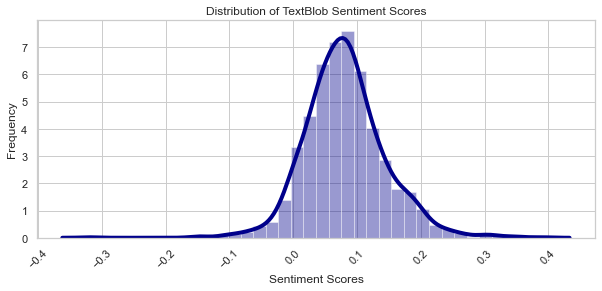

In [508]:
sns.set(rc={'figure.figsize':(10,4)})

sns.set_style("whitegrid")

sns.distplot(tone2_values, hist=True, kde=True, 
             bins=36, color = 'darkblue', 
             hist_kws={'edgecolor':'white'},
             kde_kws={'linewidth': 4})


# Add labels and title
plt.xlabel("Sentiment Scores")
plt.ylabel("Frequency")
plt.title("Distribution of TextBlob Sentiment Scores")


# Rotate x axis labels to prevent overlapping
plt.xticks(rotation=45)

# Show plot
plt.show()


/Users/le/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



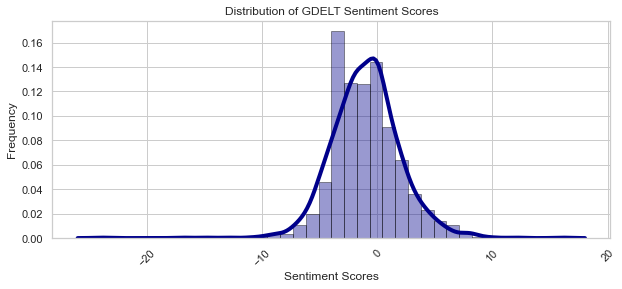

In [509]:
sns.set_style("whitegrid")

sns.distplot(tone1_values, hist=True, kde=True, 
             bins=36, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})


# Add labels and title
plt.xlabel("Sentiment Scores")
plt.ylabel("Frequency")
plt.title("Distribution of GDELT Sentiment Scores")

# Rotate x axis labels to prevent overlapping
plt.xticks(rotation=45)

# Show plot
plt.show()

In [775]:
from scipy.stats import shapiro, levene

# Test for normality
shapiro_test_results = shapiro(tone1_values)
p_value_tone1 = shapiro_test_results[1]
shapiro_test_results = shapiro(tone2_values)
p_value_tone2 = shapiro_test_results[1]

# Print the results
print("P-value for normality of tone1_values:", p_value_tone1)
print("P-value for normality of tone2_values:", p_value_tone2)

P-value for normality of tone1_values: 2.3861299467340725e-20
P-value for normality of tone2_values: 1.9681035522580283e-16


In [776]:
from scipy.stats import spearmanr

# gdelt_tone and vader_tone are your data
correlation, p_value = spearmanr(tone1_values, tone2_values)

print("Spearman Correlation Coefficient:", correlation)
print("P-Value:", p_value)

Spearman Correlation Coefficient: 0.427043684325864
P-Value: 2.0101356899597936e-74


In [750]:
from scipy.stats import spearmanr

# gdelt_tone and vader_tone are your data
correlation, p_value = pearsonr(tone1_values, tone2_values)

print("Spearman Correlation Coefficient:", correlation)
print("P-Value:", p_value)

Spearman Correlation Coefficient: 0.3971731129526595
P-Value: 9.909512507472765e-64


### Variance Consistency

#### Create new variance_df

In [693]:
# Create an empty DataFrame for storing variance data
variance_df = pd.DataFrame(columns=['Country', 'Variance', 'Count', 'Year'])

# Iterate through years (2017 to 2023)
for year in range(2017, 2024):
    year_str = str(year)
    
    # Create a dictionary to store tone scores for each country in the current year
    country_tone_scores = {}
    
    for result in final_results[year_str]:
        country = result['sourcecountry']
        tone = result['tone']
        
        # Initialize the list for the country if it doesn't exist
        if country not in country_tone_scores:
            country_tone_scores[country] = []
        
        country_tone_scores[country].append(tone)
    
    # Calculate the variance for each country's tone scores in the current year
    year_variances = [{'Country': country, 'Variance': pd.Series(tone_scores).var(), 'Count':len(tone_scores),'Year': year} for country, tone_scores in country_tone_scores.items()]
    variance_df = pd.concat([variance_df, pd.DataFrame(year_variances)])

# Convert the 'Variance' column to float
variance_df['Variance'] = variance_df['Variance'].astype(float)


In [724]:
global_tone_scores_nonaverage = {}  # Initialize the dictionary to store tone scores

for year, results in final_results.items():
    year_tone_scores = []  # Initialize the tone scores for the current year
    
    for result in results:
        tone = result['tone']
        year_tone_scores.append(tone)
    
    global_tone_scores_nonaverage[int(year)] = year_tone_scores

In [695]:
# Calculate sum of counts and average tone for each year
yearly_stats = country_df.groupby('Year').agg({'Count': 'sum', 'Average Tone': 'mean'}).reset_index()
for year in range(2017,2024):
    yearly_stats.loc[year-2017,'Average Tone'] = np.var(global_tone_scores_nonaverage[year])


# Create a DataFrame for 'Global' with the yearly stats
global_data = {
    'Country': ['Global'] * len(yearly_stats),
    'Count': yearly_stats['Count'],
    'Variance': yearly_stats['Average Tone'],
    'Year': yearly_stats['Year']
}
global_df = pd.DataFrame(global_data)

variance_df = pd.concat([variance_df, global_df]).sort_values(by=['Year', 'Count'], ascending=[True, False]).reset_index(drop=True)
variance_df.index +=1

#### Plot

In [747]:
colour_dict = ['#f781bf','#984ea3','#e41a1c','#377eb8','#ff7f00','#ffff33','#a65628','#4daf4a']

fig = px.scatter(variance_df[variance_df['Country'].isin(major_countries)],
                 x="Year", y="Variance", color="Country", title="Variance by Year (GDELT)", hover_data = ['Count'],
                  category_orders={'Country': ['Global', 'Hong Kong', 'China', 'United States', 'India', 'United Kingdom', 'Malaysia', 'Pakistan' ]}, color_discrete_sequence=colour_dict,
                  template='plotly_white')

for country in country_df['Country']:
    fig.update_traces(marker=dict(size=15, line=dict(width=2)), selector=dict(name=country))

# Update marker size and shape for "Hong Kong" points
fig.update_traces(marker=dict(symbol='x-dot'), selector=dict(name='Global'))
fig.update_traces(marker=dict(symbol='square'), selector=dict(name=major_countries[0]))
fig.update_traces(marker=dict(symbol='cross'), selector=dict(name=major_countries[1]))
fig.update_traces(marker=dict(symbol='circle'), selector=dict(name=major_countries[2]))
fig.update_traces(marker=dict(symbol='triangle-up'), selector=dict(name=major_countries[3]))
fig.update_traces(marker=dict(symbol='pentagon'), selector=dict(name=major_countries[4]))
fig.update_traces(marker=dict(symbol='diamond-wide'), selector=dict(name=major_countries[5]))
fig.update_traces(marker=dict(symbol='star-dot'), selector=dict(name=major_countries[6]))
fig.update_traces(marker=dict(symbol='bowtie'), selector=dict(name=major_countries[7]))

# Make the figure bigger
fig.update_layout(title_x=0.05, title_y=0.88)
fig.update_layout(autosize=False, width=1200, height=600)
fig.layout.legend.tracegroupgap = 5

fig.show()


#### Brown-Forsythe Test

##### Function

In [704]:
def brownf_test(x, y):
    x_tone_scores = {}
    y_tone_scores = {}
    p_values = []

    for year in range(2017, 2024):
        x_tone_scores[year] = []
        y_tone_scores[year] = []

        for row in final_results[str(year)]:
            if row['sourcecountry'] == x:
                x_tone_scores[year].append(row['tone'])
            elif row['sourcecountry'] == y:
                y_tone_scores[year].append(row['tone'])

    for year in years:
    # Perform a two-sample t-test
        _, p_value = stats.levene(x_tone_scores[year], y_tone_scores[year], center='median')

        # Store the p-value in the list
        p_values.append(p_value) 
    
    return p_values


##### Hong Kong vs Global

In [717]:
HK_tone_scores_nonaverage = {}  # Initialize the dictionary to store tone scores

for year, results in final_results.items():
    year_tone_scores = []  # Initialize the tone scores for the current year
    
    for result in results:
        if result['sourcecountry'] == 'Hong Kong':
            tone = result['tone']
            year_tone_scores.append(tone)
    
    HK_tone_scores_nonaverage[int(year)] = year_tone_scores

In [726]:
for year in years:
   # Perform a two-sample t-test
    statistic, p_value = stats.levene(HK_tone_scores_nonaverage[year], global_tone_scores_nonaverage[year], center='median')

    # Store the p-value in the list
    print(year)
    #print(statistic, p_value)
    if p_value < alpha:
        print("Reject the null hypothesis  ", p_value)
    else:
        print("Fail to reject the null hypothesis ", p_value)

2017
Reject the null hypothesis   4.1071305894353285e-07
2018
Reject the null hypothesis   2.5648118082498777e-09
2019
Fail to reject the null hypothesis  0.23838874430230642
2020
Reject the null hypothesis   0.045338551179896165
2021
Fail to reject the null hypothesis  0.48920476274528835
2022
Fail to reject the null hypothesis  0.2372651252299205
2023
Reject the null hypothesis   0.04212964915714463


##### Hong Kong vs China

In [727]:
p_values = brownf_test('Hong Kong', 'China')
check_pvalues(p_values)

2017
Fail to reject the null hypothesis: There is no significant difference.  0.09199944539718899
2018
Reject the null hypothesis: There is a significant difference.  3.7685288489083394e-05
2019
Reject the null hypothesis: There is a significant difference.  3.332075023670767e-06
2020
Reject the null hypothesis: There is a significant difference.  0.0003011602988263944
2021
Fail to reject the null hypothesis: There is no significant difference.  0.14568349905016298
2022
Fail to reject the null hypothesis: There is no significant difference.  0.41906865453214914
2023
Fail to reject the null hypothesis: There is no significant difference.  0.39767204688657554


##### Hong Kong vs United States

In [888]:
p_values = brownf_test('Hong Kong', 'United States')
check_pvalues(p_values)

2017
Fail to reject the null hypothesis: There is no significant difference.  0.4207578016766941
2018
Fail to reject the null hypothesis: There is no significant difference.  0.44085086246558713
2019
Reject the null hypothesis: There is a significant difference.  0.022404711914656955
2020
Reject the null hypothesis: There is a significant difference.  0.0007264658481852768
2021
Fail to reject the null hypothesis: There is no significant difference.  0.07976421308017925
2022
Fail to reject the null hypothesis: There is no significant difference.  0.21465533461662448
2023
Fail to reject the null hypothesis: There is no significant difference.  0.7529273008962805


##### Hong Kong vs India

In [719]:
p_values = brownf_test('Hong Kong', 'India')
check_pvalues(p_values)

2017
Reject the null hypothesis: There is a significant difference.  0.0017634342983251952
2018
Reject the null hypothesis: There is a significant difference.  0.004933161688632113
2019
Reject the null hypothesis: There is a significant difference.  0.005248654218492027
2020
Reject the null hypothesis: There is a significant difference.  7.172692874889449e-06
2021
Fail to reject the null hypothesis: There is no significant difference.  0.14388119572475766
2022
Fail to reject the null hypothesis: There is no significant difference.  0.3992831771236993
2023
Fail to reject the null hypothesis: There is no significant difference.  0.8847173030063069


##### Hong Kong vs United Kingdom

In [720]:
p_values = brownf_test('Hong Kong', 'United Kingdom')
check_pvalues(p_values)

2017
Fail to reject the null hypothesis: There is no significant difference.  0.28872860133709854
2018
Reject the null hypothesis: There is a significant difference.  0.01701697591590101
2019
Fail to reject the null hypothesis: There is no significant difference.  0.9245475182438405
2020
Reject the null hypothesis: There is a significant difference.  0.017496843048217272
2021
Fail to reject the null hypothesis: There is no significant difference.  0.2730652114860289
2022
Fail to reject the null hypothesis: There is no significant difference.  0.7204643903289691
2023
Fail to reject the null hypothesis: There is no significant difference.  0.7952226662980587


##### Hong Kong vs Malaysia

In [721]:
p_values = brownf_test('Hong Kong', 'Malaysia')
check_pvalues(p_values)

2017
Reject the null hypothesis: There is a significant difference.  0.025468858542320887
2018
Fail to reject the null hypothesis: There is no significant difference.  0.2722919745219524
2019
Fail to reject the null hypothesis: There is no significant difference.  0.43630520749862045
2020
Fail to reject the null hypothesis: There is no significant difference.  0.11988466350105297
2021
Fail to reject the null hypothesis: There is no significant difference.  0.39640501524294547
2022
Fail to reject the null hypothesis: There is no significant difference.  0.9933027655242188
2023
Fail to reject the null hypothesis: There is no significant difference.  0.41871283343574395


##### Hong Kong vs Pakistan

In [722]:
p_values = brownf_test('Hong Kong', 'Pakistan')
check_pvalues(p_values)

2017
Reject the null hypothesis: There is a significant difference.  1.4197513442297406e-10
2018
Reject the null hypothesis: There is a significant difference.  1.5278305301730566e-10
2019
Reject the null hypothesis: There is a significant difference.  0.020469431950846925
2020
Fail to reject the null hypothesis: There is no significant difference.  0.22251170000639947
2021
Fail to reject the null hypothesis: There is no significant difference.  0.12013000118969472
2022
Fail to reject the null hypothesis: There is no significant difference.  0.21883655653784442
2023
Fail to reject the null hypothesis: There is no significant difference.  0.2153150602909191


## Text Analysis

### Hong Kong Riots

In [729]:
import re

riot_dict = {}  # Initialize the riot_dict

for year in years:
    year = str(year)
    riot_list = []  # Initialize a list to store riot-related information for this year
    for num, article in enumerate(final_results[year]):
        if article['sourcecountry'] == 'Hong Kong':
            sentences = article['text'].split('.')  # Split text into sentences
            for sentence in sentences:
                # Use regular expressions to match whole words 'riot' or 'protest'
                if re.search(r'\b(riot|protest|riots|protests)\b', sentence, flags=re.I):
                    # Create a dictionary for the current sentence
                    sentence_info = {
                        'year': year,
                        'sentence': sentence.strip(),  # Remove leading/trailing whitespace
                        'tone': article['tone']  # You can add the tone information if available
                    }
                    riot_list.append(sentence_info)
    if riot_list:  # Add the year to riot_dict only if there are relevant sentences
        riot_dict[year] = riot_list


#### 2018

In [730]:
tone = 0
for num in range(len(riot_dict['2018'])):
    tone += riot_dict['2018'][num]['tone']
tone = tone/len(riot_dict['2018'])
print(tone,len(riot_dict['2018']))

-3.8461538461538463 65


#### 2019

In [731]:
hkriot_dict_2019 = riot_dict['2019'][-13:]

In [732]:
hkriot_dict_2019

[{'year': '2019',
  'sentence': 'That the business sector, which tends to be pro-government and opposed the Occupy protests, voiced concerns about the bill should have been a wake-up call',
  'tone': -5},
 {'year': '2019',
  'sentence': 'International fund companies are unfazed by the protests that have wracked Hong Kong for more than a month, focusing instead on the potential of the Greater Bay Area and the Belt and Road Initiative\n\nUS fund manager Federated Investors, with US$485 billion worth of assets under management as well as its 60 per cent owned British fund house Hermes Investment Management, both plan to continue to expand in Hong Kong as part of their long-term strategy in Asia',
  'tone': 0},
 {'year': '2019',
  'sentence': 'Hong Kong has seen many protests since June 9 to oppose the now suspended extradition bill, which would have transferred fugitives to jurisdictions where it has no extradition agreements including mainland China',
  'tone': 0},
 {'year': '2019',
  's

In [733]:
tone = 0
for num in range(len(hkriot_dict_2019)):
    tone += riot_dict['2018'][num]['tone']
tone = tone/len(hkriot_dict_2019)
print(tone,len(hkriot_dict_2019))

-3.3846153846153846 13


### National Security Law

In [734]:
import re

nsl_dict = {}  # Initialize the riot_dict

for year in years:
    year = str(year)
    nsl_list = []  # Initialize a list to store riot-related information for this year
    for num, article in enumerate(final_results[year]):
        if article['sourcecountry'] == 'Hong Kong':
            sentences = article['text'].split('.')  # Split text into sentences
            for sentence in sentences:
                # Use regular expressions to match whole words 'riot' or 'protest'
                if re.search(r'\b(national security law)\b', sentence, flags=re.I):
                    # Create a dictionary for the current sentence
                    sentence_info = {
                        'year': year,
                        'sentence': sentence.strip(),  # Remove leading/trailing whitespace
                        'tone': article['tone']  # You can add the tone information if available
                    }
                    nsl_list.append(sentence_info)
    if nsl_list:  # Add the year to riot_dict only if there are relevant sentences
        nsl_dict[year] = nsl_list


In [738]:

for year in [2017,2018,2020,2021,2022,2023]:
    average_tone = 0
    try:
        print(year, "Number of articles mentioning NSL: ", len(nsl_dict[str(year)]))
        for num in range(len(nsl_dict[str(year)])):
            average_tone += nsl_dict[str(year)][num]['tone']
    except:
        pass
    print("Average tone of articles: ", average_tone/len(nsl_dict[str(year)]))

2017 Number of articles mentioning NSL:  5
Average tone of articles:  -2.4
2018 Number of articles mentioning NSL:  2
Average tone of articles:  -5.0
2020 Number of articles mentioning NSL:  4
Average tone of articles:  -4.25
2021 Number of articles mentioning NSL:  1
Average tone of articles:  -1.0
2022 Number of articles mentioning NSL:  2
Average tone of articles:  2.0
2023 Number of articles mentioning NSL:  6
Average tone of articles:  0.3333333333333333


## Miscellaneous 

In [181]:
UNSD_region = pd.read_csv('BRI_countries.csv', sep=',')
UNSD_region.loc[UNSD_region['Country'] == 'Central African Republic', 'Likely date of joining'] = '01/11/21'
UNSD_region.loc[UNSD_region['Country'] == 'Syrian Arab Republic', 'Likely date of joining'] = '01/01/22'
UNSD_region.loc[UNSD_region['Country'] == 'Turkmenistan', 'Likely date of joining'] = '01/06/17'

In [182]:
desired_columns = ['Country', 'Country Code']  # List of columns you want to keep

# Selecting only the desired columns
BRI_df = UNSD_region[desired_columns]
BRI_df['Category'] = 'BRI Countries'
BRI_df.loc[BRI_df['Country'] == 'Italy', 'Category'] = 'Exited BRI'

<ipython-input-182-5058ba3dbcaf>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [224]:
# Assuming your DataFrame is named new_df
# Convert 'Likely date of joining' to datetime format
UNSD_region['Likely date of joining'] = pd.to_datetime(UNSD_region['Likely date of joining'], format='%d/%m/%y')

# Extract year from 'Likely date of joining' and create a new column 'Year of MOU'
BRI_df['Year of MOU'] = UNSD_region['Likely date of joining'].dt.year.astype(str)
BRI_df['Year of MOU'] = BRI_df['Year of MOU'].str.replace(".0", "")
BRI_df['Year of MOU'] = BRI_df['Year of MOU'].str.replace("nan", "Unclear")
BRI_df.loc[BRI_df['Country'] == 'Italy', 'Year of MOU'] = 'Exited'

BRI_df.sort_values(by=['Year of MOU'], inplace=True)


<ipython-input-224-ee9923b0163c>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-224-ee9923b0163c>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-224-ee9923b0163c>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-224-ee9

In [551]:
fig = px.choropleth(BRI_df,
    locations=BRI_df['Country'], 
    locationmode="country names",
    color='Year of MOU',
    labels = ({'Year of MOU':'Year of MOU'}),
    color_discrete_map={
        'Exited': '#d73027',
        'Unclear': '#fdae61',
        '2013': '#45598d',
        '2014': '#516495',
        '2015': '#5d6f9e',
        '2016': '#697aa7',
        '2017': '#7486b0',
        '2018': '#8092b9',
        '2019': '#8ea0c3',
        '2020': '#9baece',
        '2021': '#a9bcd8',
        '2022': '#b6cae3',
        '2023': '#c6dbef'
        },
        template='plotly_white'
)

# Set legend title and position
fig.update_layout(
    legend=dict(
        x=0.06,
        y=0,
        traceorder="reversed",
        title_font_family="Times New Roman",
        font=dict(
            family="Times New Roman",
            size=12,
            color="black"
        ),
        bgcolor="#fee8c8",
        bordercolor="Grey",
        borderwidth=2
    ),
    width=1200,
    height=600,
    title='Countries of the Belt and Road Initiative', title_x = 0.115
)


fig.show()

In [676]:
#get total count of final_results
count = 0
for year in range(2017,2024):
    count += len(final_results[str(year)])
print(f"Total number of articles: {count}")

unique_domains = set()

# Loop through each year's data and extract unique domains
for year_data in final_results.values():
    for entry in year_data:
        unique_domains.add(entry['domain'])

total_unique_domains = len(unique_domains)
print(f"Total number of unique domains across the dataset: {total_unique_domains}")

unique_countries = set()

for year_data in final_results.values():
    for entry in year_data:
        unique_countries.add(entry['sourcecountry'])

total_unique_countries = len(unique_countries)
print(f"Total number of unique countries across the dataset: {total_unique_countries}")

Total number of articles: 85982
Total number of unique domains across the dataset: 3485
Total number of unique countries across the dataset: 161
